** LoanTap**


LoanTap is an online platform committed to delivering customized loan products to millennials. They innovate in an otherwise dull loan segment, to deliver instant, flexible loans on consumer friendly terms to salaried professionals and businessmen.

The data science team at LoanTap is building an underwriting layer to determine the creditworthiness of MSMEs as well as individuals.

LoanTap deploys formal credit to salaried individuals and businesses 4 main financial instruments:


1. Personal Loan
2. EMI Free Loan
3. Personal Overdraft
4. Advance Salary Loan

This case study will focus on the underwriting process behind Personal Loan only

In [155]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from google.colab import drive

In [156]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_classification
from sklearn.metrics import classification_report

**Import the dataset and do usual exploratory data analysis steps like checking the structure & characteristics of the dataset**

In [157]:
path = "/content/drive/MyDrive/Scaler project csv files/logistic_regression.csv"
df = pd.read_csv(path)
df.head()

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,title,dti,earliest_cr_line,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,application_type,mort_acc,pub_rec_bankruptcies,address
0,10000.0,36 months,11.44,329.48,B,B4,Marketing,10+ years,RENT,117000.0,Not Verified,Jan-2015,Fully Paid,vacation,Vacation,26.24,Jun-1990,16.0,0.0,36369.0,41.8,25.0,w,INDIVIDUAL,0.0,0.0,"0174 Michelle Gateway\r\nMendozaberg, OK 22690"
1,8000.0,36 months,11.99,265.68,B,B5,Credit analyst,4 years,MORTGAGE,65000.0,Not Verified,Jan-2015,Fully Paid,debt_consolidation,Debt consolidation,22.05,Jul-2004,17.0,0.0,20131.0,53.3,27.0,f,INDIVIDUAL,3.0,0.0,"1076 Carney Fort Apt. 347\r\nLoganmouth, SD 05113"
2,15600.0,36 months,10.49,506.97,B,B3,Statistician,< 1 year,RENT,43057.0,Source Verified,Jan-2015,Fully Paid,credit_card,Credit card refinancing,12.79,Aug-2007,13.0,0.0,11987.0,92.2,26.0,f,INDIVIDUAL,0.0,0.0,"87025 Mark Dale Apt. 269\r\nNew Sabrina, WV 05113"
3,7200.0,36 months,6.49,220.65,A,A2,Client Advocate,6 years,RENT,54000.0,Not Verified,Nov-2014,Fully Paid,credit_card,Credit card refinancing,2.60,Sep-2006,6.0,0.0,5472.0,21.5,13.0,f,INDIVIDUAL,0.0,0.0,"823 Reid Ford\r\nDelacruzside, MA 00813"
4,24375.0,60 months,17.27,609.33,C,C5,Destiny Management Inc.,9 years,MORTGAGE,55000.0,Verified,Apr-2013,Charged Off,credit_card,Credit Card Refinance,33.95,Mar-1999,13.0,0.0,24584.0,69.8,43.0,f,INDIVIDUAL,1.0,0.0,"679 Luna Roads\r\nGreggshire, VA 11650"


In [158]:
df.tail()

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,title,dti,earliest_cr_line,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,application_type,mort_acc,pub_rec_bankruptcies,address
396025,10000.0,60 months,10.99,217.38,B,B4,licensed bankere,2 years,RENT,40000.0,Source Verified,Oct-2015,Fully Paid,debt_consolidation,Debt consolidation,15.63,Nov-2004,6.0,0.0,1990.0,34.3,23.0,w,INDIVIDUAL,0.0,0.0,"12951 Williams Crossing\r\nJohnnyville, DC 30723"
396026,21000.0,36 months,12.29,700.42,C,C1,Agent,5 years,MORTGAGE,110000.0,Source Verified,Feb-2015,Fully Paid,debt_consolidation,Debt consolidation,21.45,Feb-2006,6.0,0.0,43263.0,95.7,8.0,f,INDIVIDUAL,1.0,0.0,"0114 Fowler Field Suite 028\r\nRachelborough, ..."
396027,5000.0,36 months,9.99,161.32,B,B1,City Carrier,10+ years,RENT,56500.0,Verified,Oct-2013,Fully Paid,debt_consolidation,pay off credit cards,17.56,Mar-1997,15.0,0.0,32704.0,66.9,23.0,f,INDIVIDUAL,0.0,0.0,"953 Matthew Points Suite 414\r\nReedfort, NY 7..."
396028,21000.0,60 months,15.31,503.02,C,C2,"Gracon Services, Inc",10+ years,MORTGAGE,64000.0,Verified,Aug-2012,Fully Paid,debt_consolidation,Loanforpayoff,15.88,Nov-1990,9.0,0.0,15704.0,53.8,20.0,f,INDIVIDUAL,5.0,0.0,"7843 Blake Freeway Apt. 229\r\nNew Michael, FL..."
396029,2000.0,36 months,13.61,67.98,C,C2,Internal Revenue Service,10+ years,RENT,42996.0,Verified,Jun-2010,Fully Paid,debt_consolidation,Toxic Debt Payoff,8.32,Sep-1998,3.0,0.0,4292.0,91.3,19.0,f,INDIVIDUAL,NaN,0.0,"787 Michelle Causeway\r\nBriannaton, AR 48052"


 **Exploratory Data Analysis**

In [159]:
df.shape

(396030, 27)

In [160]:
df.describe()

,loan_amnt,int_rate,installment,annual_inc,dti,open_acc,pub_rec,revol_bal,revol_util,total_acc,mort_acc,pub_rec_bankruptcies
count,396030.000000,396030.000000,396030.000000,3.960300e+05,396030.000000,396030.000000,396030.000000,3.960300e+05,395754.000000,396030.000000,358235.000000,395495.000000
mean,14113.888089,13.639400,431.849698,7.420318e+04,17.379514,11.311153,0.178191,1.584454e+04,53.791749,25.414744,1.813991,0.121648
std,8357.441341,4.472157,250.727790,6.163762e+04,18.019092,5.137649,0.530671,2.059184e+04,24.452193,11.886991,2.147930,0.356174
min,500.000000,5.320000,16.080000,0.000000e+00,0.000000,0.000000,0.000000,0.000000e+00,0.000000,2.000000,0.000000,0.000000
25%,8000.000000,10.490000,250.330000,4.500000e+04,11.280000,8.000000,0.000000,6.025000e+03,35.800000,17.000000,0.000000,0.000000
50%,12000.000000,13.330000,375.430000,6.400000e+04,16.910000,10.000000,0.000000,1.118100e+04,54.800000,24.000000,1.000000,0.000000
75%,20000.000000,16.490000,567.300000,9.000000e+04,22.980000,14.000000,0.000000,1.962000e+04,72.900000,32.000000,3.000000,0.000000
max,40000.000000,30.990000,1533.810000,8.706582e+06,9999.000000,90.000000,86.000000,1.743266e+06,892.300000,151.000000,34.000000,8.000000


In [161]:
df.columns

Index(['loan_amnt', 'term', 'int_rate', 'installment', 'grade', 'sub_grade',
       'emp_title', 'emp_length', 'home_ownership', 'annual_inc',
       'verification_status', 'issue_d', 'loan_status', 'purpose', 'title',
       'dti', 'earliest_cr_line', 'open_acc', 'pub_rec', 'revol_bal',
       'revol_util', 'total_acc', 'initial_list_status', 'application_type',
       'mort_acc', 'pub_rec_bankruptcies', 'address'],
      dtype='object')

In [162]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 396030 entries, 0 to 396029
Data columns (total 27 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   loan_amnt             396030 non-null  float64
 1   term                  396030 non-null  object 
 2   int_rate              396030 non-null  float64
 3   installment           396030 non-null  float64
 4   grade                 396030 non-null  object 
 5   sub_grade             396030 non-null  object 
 6   emp_title             373103 non-null  object 
 7   emp_length            377729 non-null  object 
 8   home_ownership        396030 non-null  object 
 9   annual_inc            396030 non-null  float64
 10  verification_status   396030 non-null  object 
 11  issue_d               396030 non-null  object 
 12  loan_status           396030 non-null  object 
 13  purpose               396030 non-null  object 
 14  title                 394275 non-null  object 
 15  

**Univariate Analysis**

In [165]:
num_vars = df.select_dtypes('float64').columns.tolist()

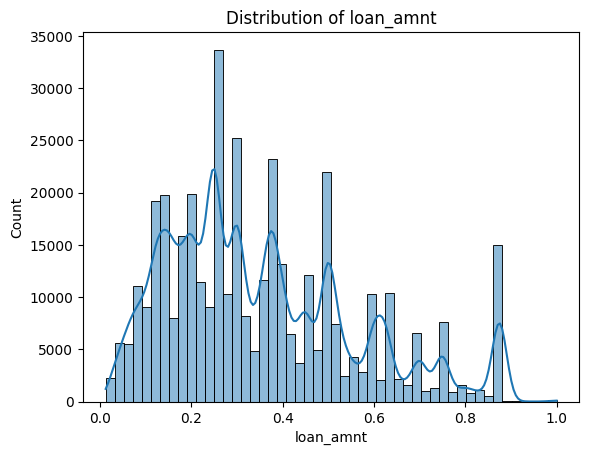

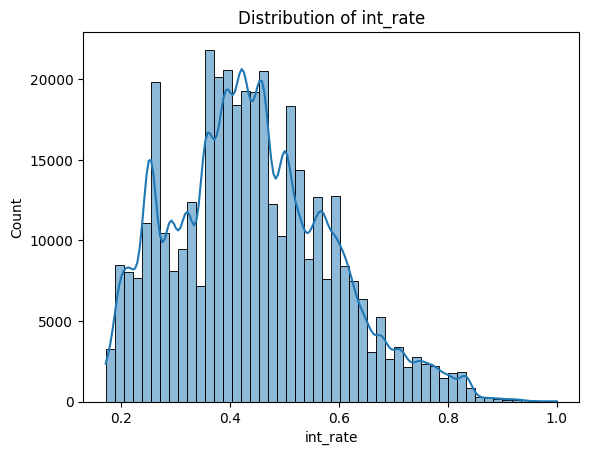

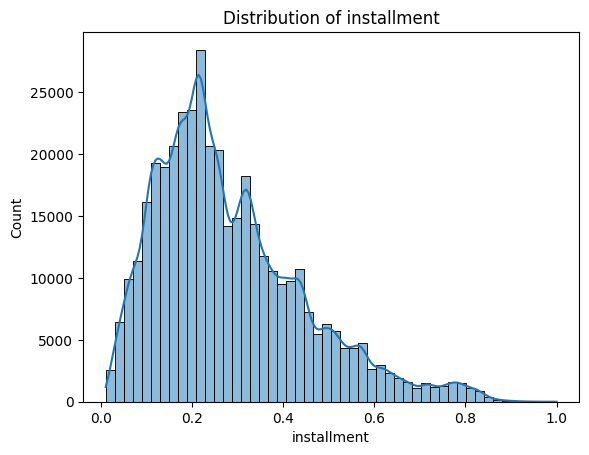

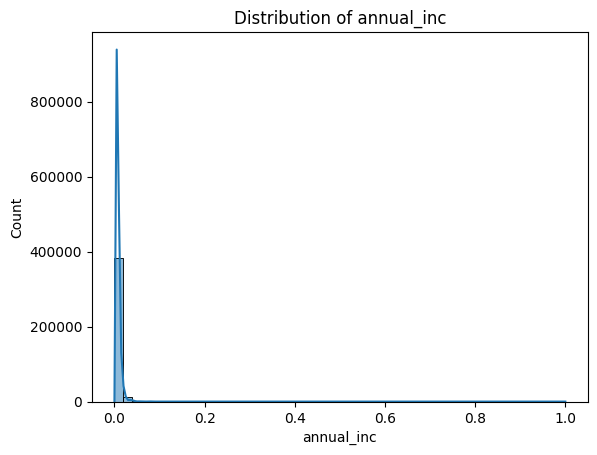

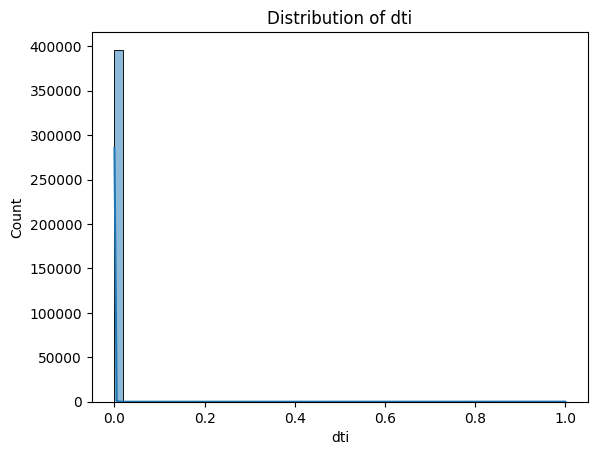

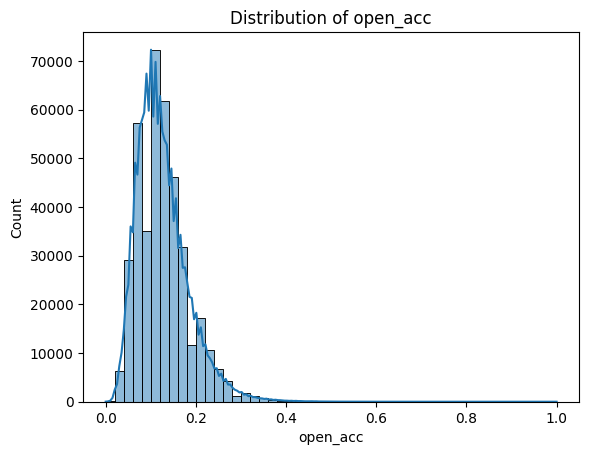

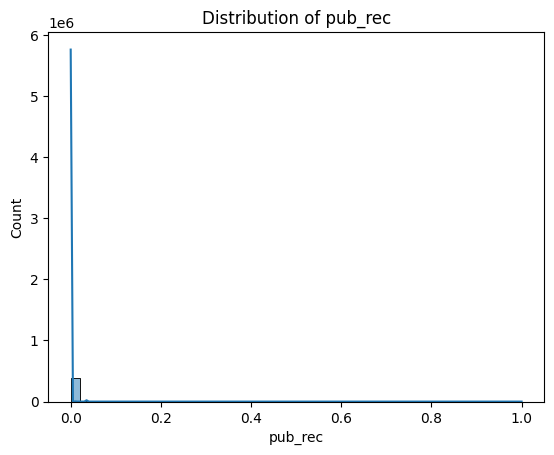

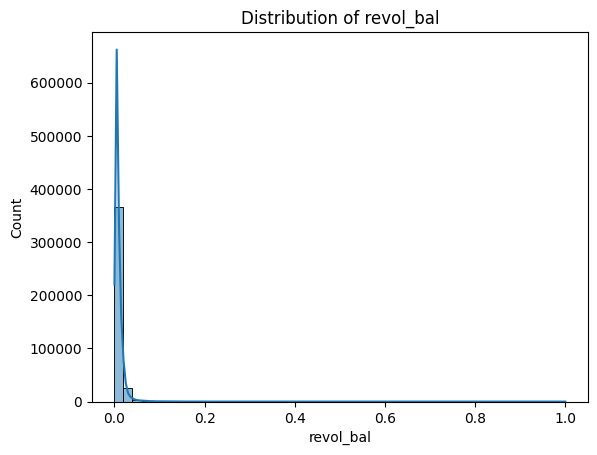

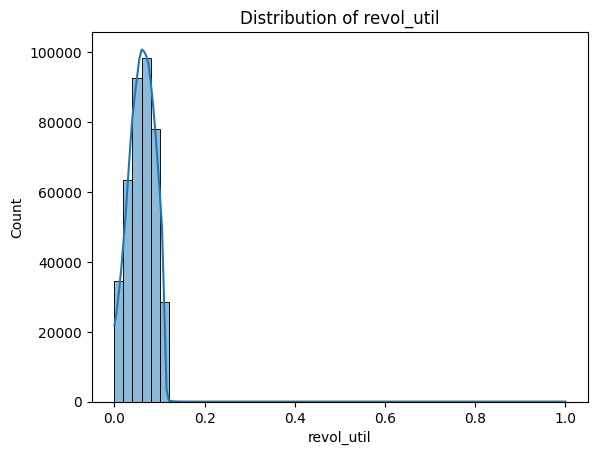

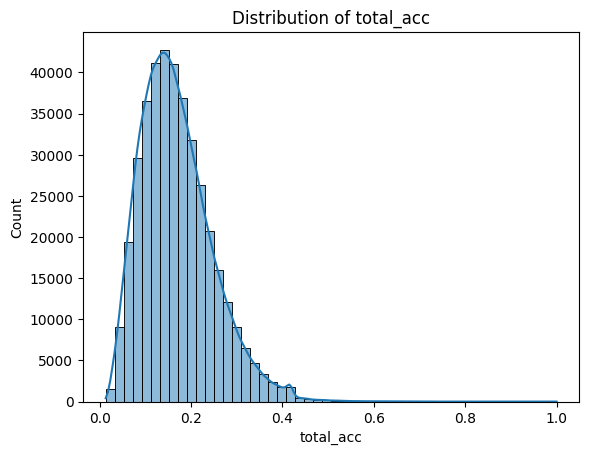

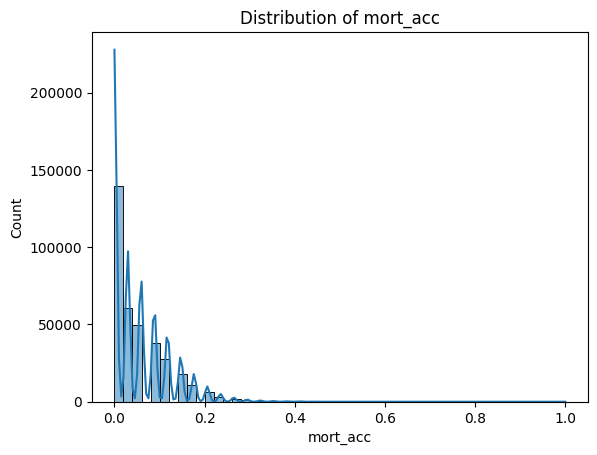

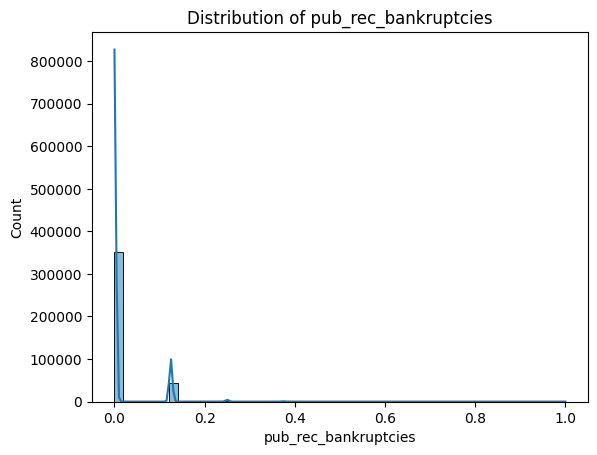

In [166]:
for i in num_vars:
#     plt.figure(figsize=(12,5))
    plt.title("Distribution of {}".format(i))
    sns.histplot(df[i]/df[i].max(), kde=True, bins=50)
    plt.show()

*   Most of the distribution is highly skewed which tells us that they might contain outliers
* Almost all the continuous features have outliers present in the dataset.
   

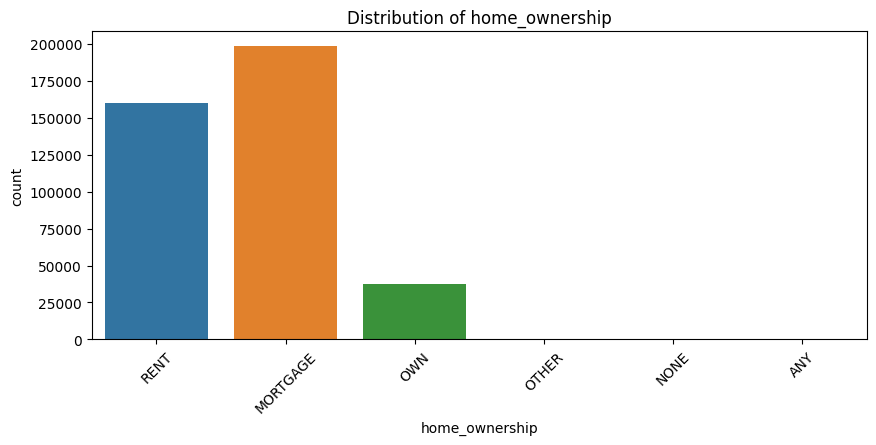

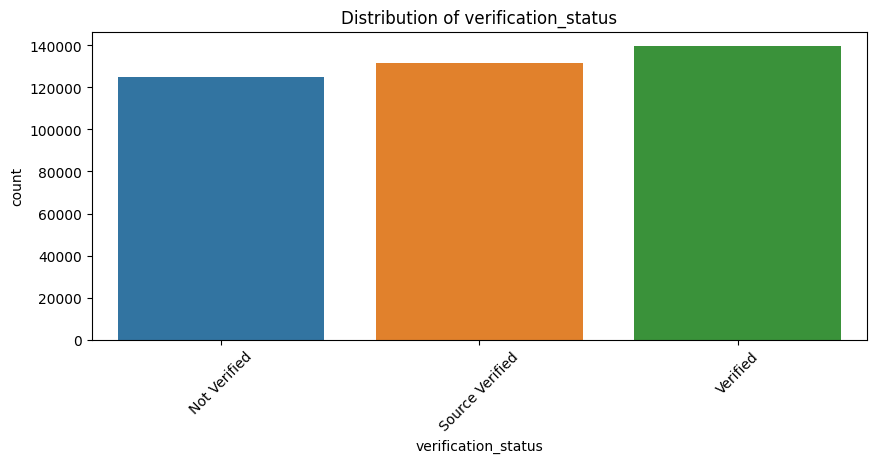

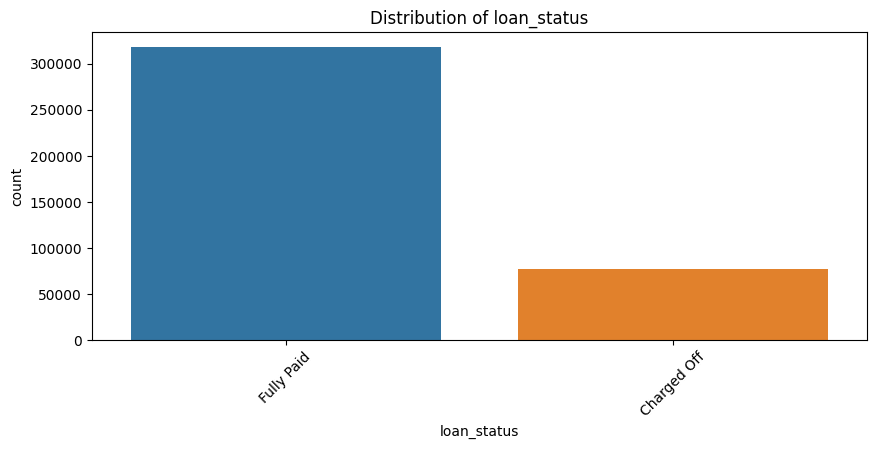

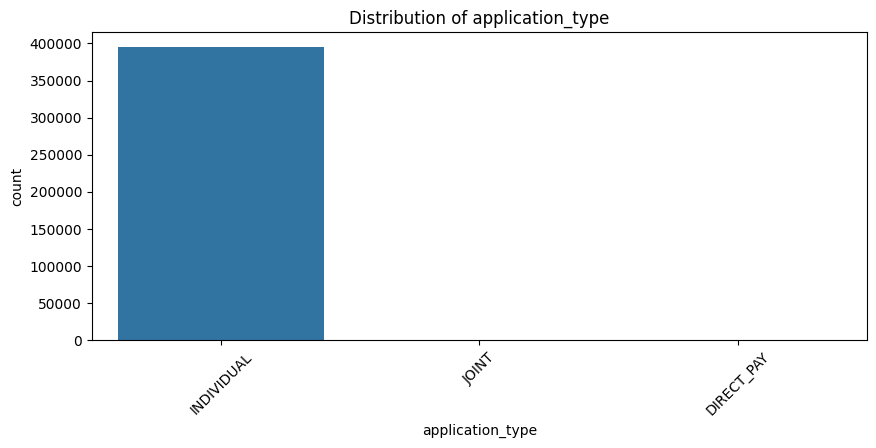

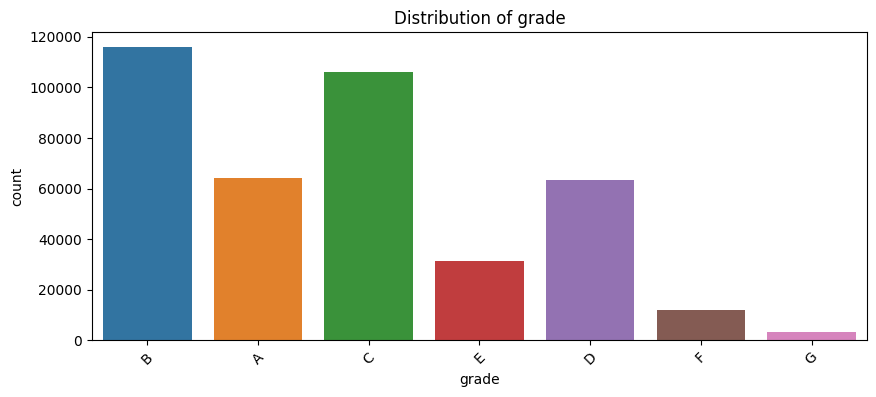

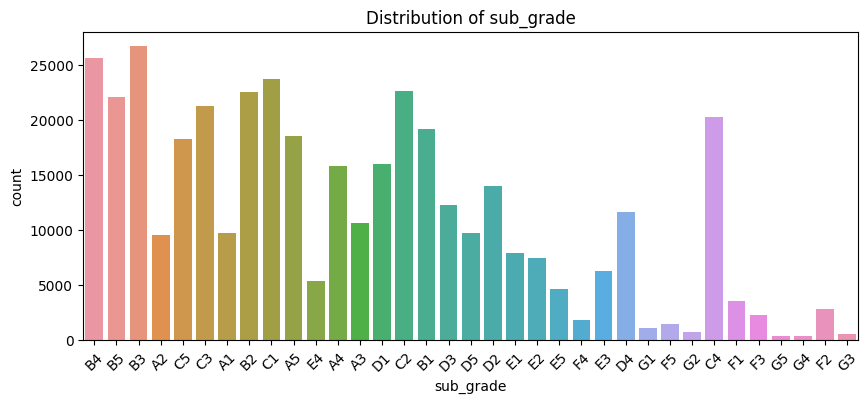

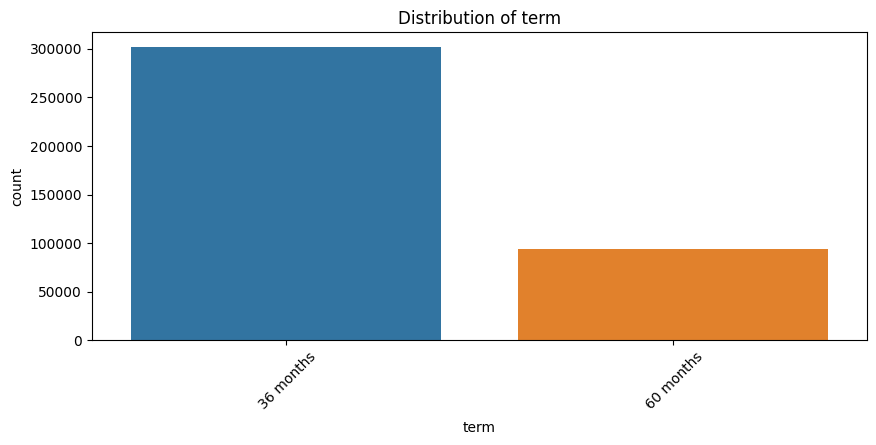

In [163]:
cat_vars = ['home_ownership', 'verification_status', 'loan_status', 'application_type', 'grade', 'sub_grade', 'term']
for i in cat_vars:
    plt.figure(figsize=(10, 4))
    plt.title(f'Distribution of {i}')
    sns.countplot(data=df, x=i)
    plt.xticks(rotation = 45)
    plt.show()

* All the application type is Individual

* Most of the loan tenure is disbursed for 36 months
* The grade of majority of people those who have took the loan is 'B' and have subgrade 'B3'.So from that we can infer that people with grade 'B' and subgrade 'B3' are more likely to fully pay the loan.

**Bivariate Analysis**

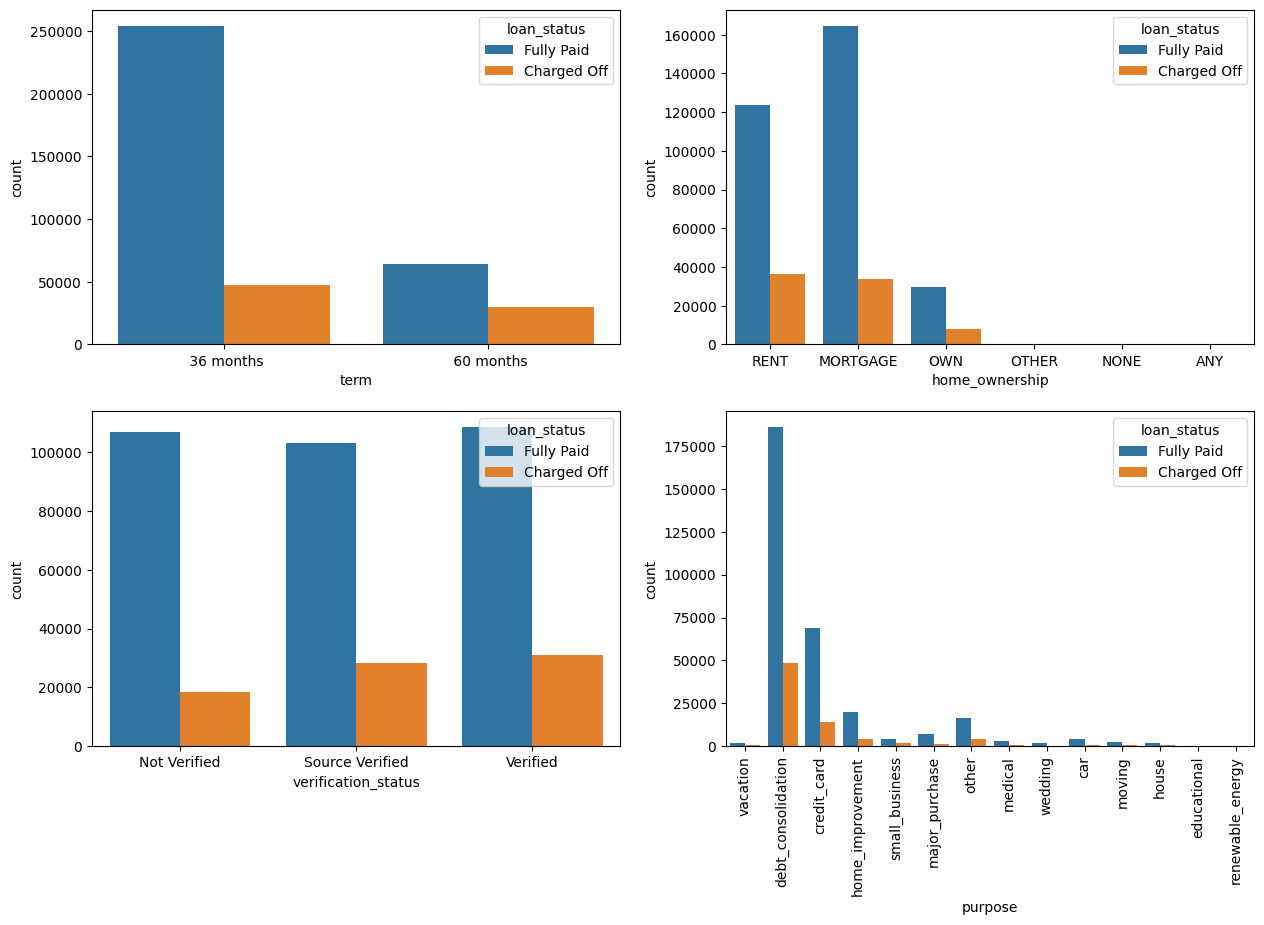

In [167]:
plt.figure(figsize=(15,20))

plt.subplot(4,2,1)
sns.countplot(x='term',data=df,hue='loan_status')

plt.subplot(4,2,2)
sns.countplot(x='home_ownership',data=df,hue='loan_status')

plt.subplot(4,2,3)
sns.countplot(x='verification_status',data=df,hue='loan_status')

plt.subplot(4,2,4)
g=sns.countplot(x='purpose',data=df,hue='loan_status')
g.set_xticklabels(g.get_xticklabels(),rotation=90)

plt.show()

**Insights**

1. Most of the people took loan for 36 months and full paid on time

2. Most of people have home ownership as mortgage and rent
3. Most of the people took loan for debt consolidations

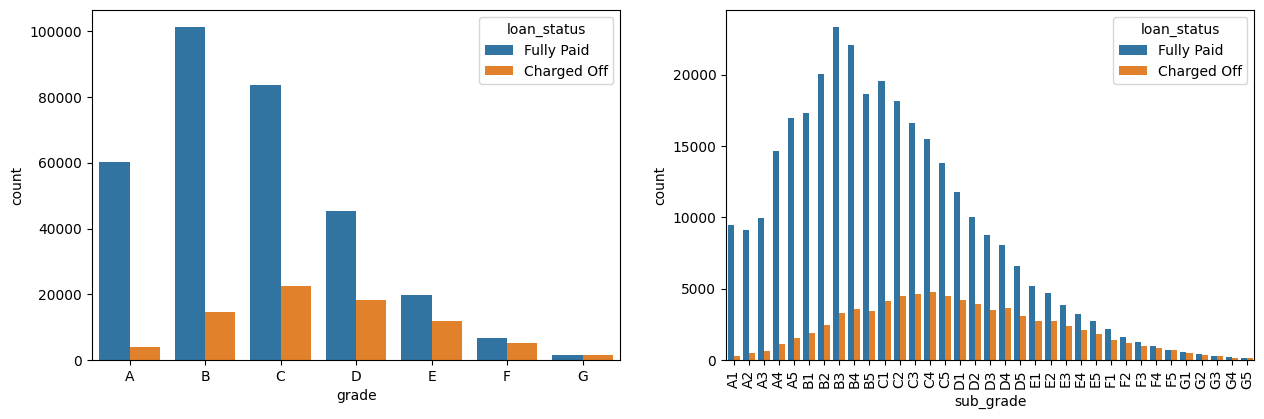

In [168]:
plt.figure(figsize=(15, 10))

plt.subplot(2, 2, 1)
grade = sorted(df.grade.unique().tolist())
sns.countplot(x='grade', data=df, hue='loan_status', order=grade)

plt.subplot(2, 2, 2)
sub_grade = sorted(df.sub_grade.unique().tolist())
g = sns.countplot(x='sub_grade', data=df, hue='loan_status', order=sub_grade)
g.set_xticklabels(g.get_xticklabels(), rotation=90)

plt.show()

**Insights**

The grade of majority of people those who have fully paid the loan is 'B' and have subgrade 'B3'.

So from that we can infer that people with grade 'B' and subgrade 'B3' are more likely to fully pay the loan.

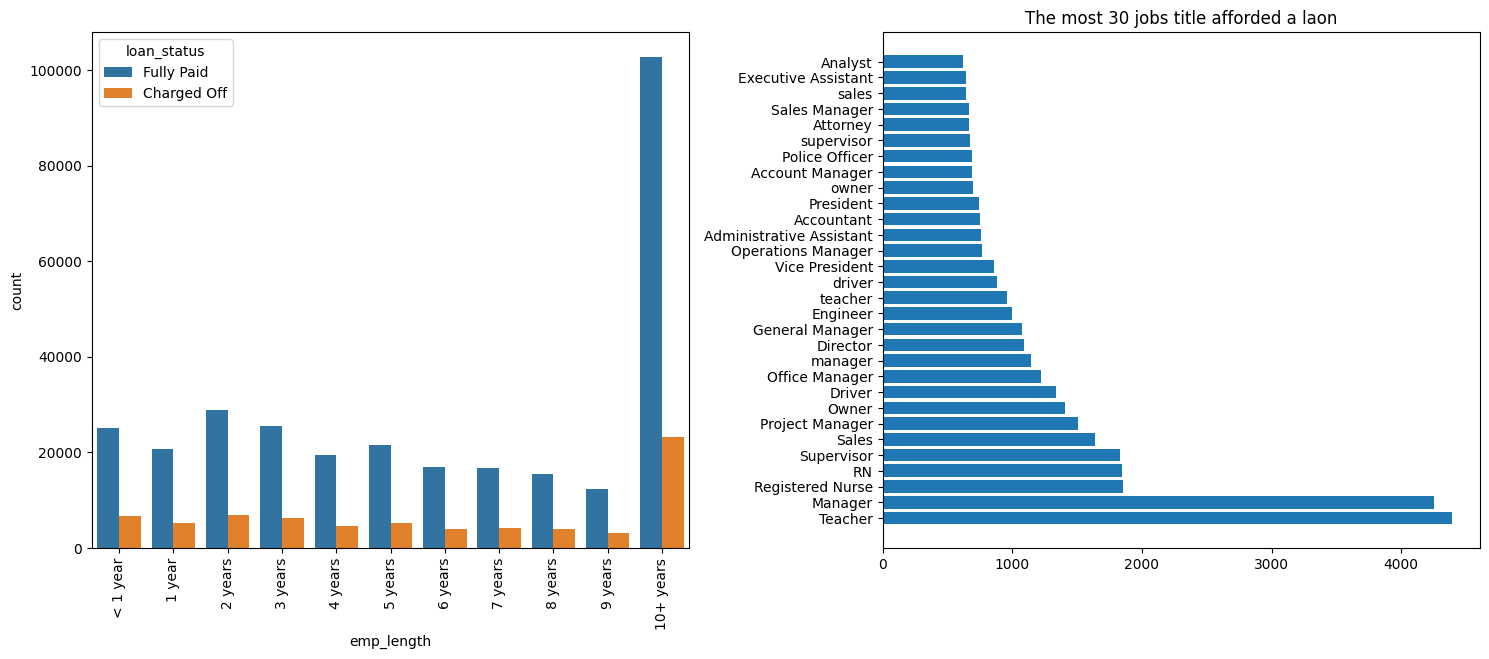

In [169]:
plt.figure(figsize=(15,12))

plt.subplot(2,2,1)
order = ['< 1 year', '1 year', '2 years', '3 years', '4 years', '5 years',
          '6 years', '7 years', '8 years', '9 years', '10+ years',]
g=sns.countplot(x='emp_length',data=df,hue='loan_status',order=order)
g.set_xticklabels(g.get_xticklabels(),rotation=90)

plt.subplot(2,2,2)
plt.barh(df.emp_title.value_counts()[:30].index,df.emp_title.value_counts()[:30])
plt.title("The most 30 jobs title afforded a laon")
plt.tight_layout()

plt.show()

**Insights**

Manager and Teacher are the most afforded loan on titles

Person who employed for more than 10 years has successfully paid of the loan

In [104]:
# Non-numeric columns
cat_cols = df.select_dtypes(include='object').columns
cat_cols

Index(['term', 'grade', 'sub_grade', 'emp_title', 'emp_length',
       'home_ownership', 'verification_status', 'issue_d', 'loan_status',
       'purpose', 'title', 'earliest_cr_line', 'initial_list_status',
       'application_type', 'address'],
      dtype='object')

In [105]:
# Number of unique values in all non-numeric columns
for col in cat_cols:
  print(f"No. of unique values in {col}: {df[col].nunique()}")

No. of unique values in term: 2
No. of unique values in grade: 7
No. of unique values in sub_grade: 35
No. of unique values in emp_title: 173105
No. of unique values in emp_length: 11
No. of unique values in home_ownership: 6
No. of unique values in verification_status: 3
No. of unique values in issue_d: 115
No. of unique values in loan_status: 2
No. of unique values in purpose: 14
No. of unique values in title: 48817
No. of unique values in earliest_cr_line: 684
No. of unique values in initial_list_status: 2
No. of unique values in application_type: 3
No. of unique values in address: 393700


In [106]:
df.duplicated().sum()

0

In [107]:
# unique values in the dataset
for col in df:
  print(f'Number of unique values in the {col} column:',df[col].nunique())

Number of unique values in the loan_amnt column: 1397
Number of unique values in the term column: 2
Number of unique values in the int_rate column: 566
Number of unique values in the installment column: 55706
Number of unique values in the grade column: 7
Number of unique values in the sub_grade column: 35
Number of unique values in the emp_title column: 173105
Number of unique values in the emp_length column: 11
Number of unique values in the home_ownership column: 6
Number of unique values in the annual_inc column: 27197
Number of unique values in the verification_status column: 3
Number of unique values in the issue_d column: 115
Number of unique values in the loan_status column: 2
Number of unique values in the purpose column: 14
Number of unique values in the title column: 48817
Number of unique values in the dti column: 4262
Number of unique values in the earliest_cr_line column: 684
Number of unique values in the open_acc column: 61
Number of unique values in the pub_rec column:

In [108]:
df.columns

Index(['loan_amnt', 'term', 'int_rate', 'installment', 'grade', 'sub_grade',
       'emp_title', 'emp_length', 'home_ownership', 'annual_inc',
       'verification_status', 'issue_d', 'loan_status', 'purpose', 'title',
       'dti', 'earliest_cr_line', 'open_acc', 'pub_rec', 'revol_bal',
       'revol_util', 'total_acc', 'initial_list_status', 'application_type',
       'mort_acc', 'pub_rec_bankruptcies', 'address'],
      dtype='object')

In [109]:
# Convert earliest credit line & issue date to datetime
df['earliest_cr_line'] = pd.to_datetime(df['earliest_cr_line'])
df['issue_d'] = pd.to_datetime(df['issue_d'])

In [110]:
#Convert employment length to numeric
d = {'10+ years':10, '4 years':4, '< 1 year':0,
     '6 years':6, '9 years':9,'2 years':2, '3 years':3,
     '8 years':8, '7 years':7, '5 years':5, '1 year':1}
df['emp_length']=df['emp_length'].replace(d)

In [111]:
#Convert columns with less number of unique values to categorical columns
cat_cols = ['term', 'grade','sub_grade','home_ownership',
            'verification_status','loan_status','purpose',
            'initial_list_status','application_type']

df[cat_cols] = df[cat_cols].astype('category')

In [112]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 396030 entries, 0 to 396029
Data columns (total 27 columns):
 #   Column                Non-Null Count   Dtype         
---  ------                --------------   -----         
 0   loan_amnt             396030 non-null  float64       
 1   term                  396030 non-null  category      
 2   int_rate              396030 non-null  float64       
 3   installment           396030 non-null  float64       
 4   grade                 396030 non-null  category      
 5   sub_grade             396030 non-null  category      
 6   emp_title             373103 non-null  object        
 7   emp_length            377729 non-null  float64       
 8   home_ownership        396030 non-null  category      
 9   annual_inc            396030 non-null  float64       
 10  verification_status   396030 non-null  category      
 11  issue_d               396030 non-null  datetime64[ns]
 12  loan_status           396030 non-null  category      
 13 

**Missing values and Outlier Treatment**

Checking the Missing Values

In [113]:
df.isnull().sum()

loan_amnt                   0
term                        0
int_rate                    0
installment                 0
grade                       0
sub_grade                   0
emp_title               22927
emp_length              18301
home_ownership              0
annual_inc                  0
verification_status         0
issue_d                     0
loan_status                 0
purpose                     0
title                    1755
dti                         0
earliest_cr_line            0
open_acc                    0
pub_rec                     0
revol_bal                   0
revol_util                276
total_acc                   0
initial_list_status         0
application_type            0
mort_acc                37795
pub_rec_bankruptcies      535
address                     0
dtype: int64

In [114]:
#persentage of data missing in each columns
round((df.isnull().sum()*100)/(len(df)), 2)

loan_amnt               0.00
term                    0.00
int_rate                0.00
installment             0.00
grade                   0.00
sub_grade               0.00
emp_title               5.79
emp_length              4.62
home_ownership          0.00
annual_inc              0.00
verification_status     0.00
issue_d                 0.00
loan_status             0.00
purpose                 0.00
title                   0.44
dti                     0.00
earliest_cr_line        0.00
open_acc                0.00
pub_rec                 0.00
revol_bal               0.00
revol_util              0.07
total_acc               0.00
initial_list_status     0.00
application_type        0.00
mort_acc                9.54
pub_rec_bankruptcies    0.14
address                 0.00
dtype: float64

In [115]:
#Filling missing values with 'Unknown' for object dtype
fill_values = {'title': 'Unknown', 'emp_title': 'Unknown'}
df.fillna(value=fill_values, inplace=True)

In [116]:
#Mean aggregation of mort_acc by total_acc to fill missing values

avg_mort = df.groupby('total_acc')['mort_acc'].mean()

def fill_mort(total_acc, mort_acc):
  if np.isnan(mort_acc):
    return avg_mort[total_acc].round()
  else:
    return mort_acc

In [117]:
df['mort_acc'] = df.apply(lambda x: fill_mort(x['total_acc'],x['mort_acc']), axis=1)

In [118]:
df.dropna(inplace=True)

In [119]:
df.isna().sum()

loan_amnt               0
term                    0
int_rate                0
installment             0
grade                   0
sub_grade               0
emp_title               0
emp_length              0
home_ownership          0
annual_inc              0
verification_status     0
issue_d                 0
loan_status             0
purpose                 0
title                   0
dti                     0
earliest_cr_line        0
open_acc                0
pub_rec                 0
revol_bal               0
revol_util              0
total_acc               0
initial_list_status     0
application_type        0
mort_acc                0
pub_rec_bankruptcies    0
address                 0
dtype: int64

In [120]:
df.shape

(376929, 27)

In [121]:
num_vars = df.select_dtypes('float64').columns.tolist()

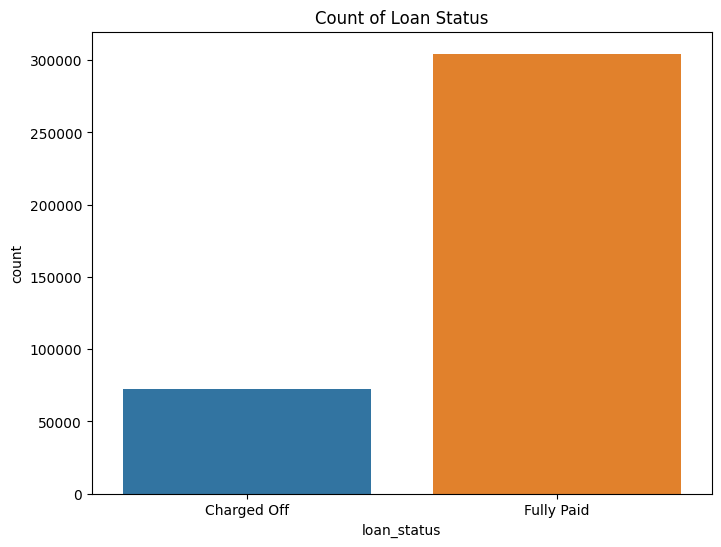

In [124]:
# Count plot for Loan_Status
plt.figure(figsize=(8, 6))
sns.countplot(x='loan_status', data=df)
plt.title('Count of Loan Status')
plt.show()

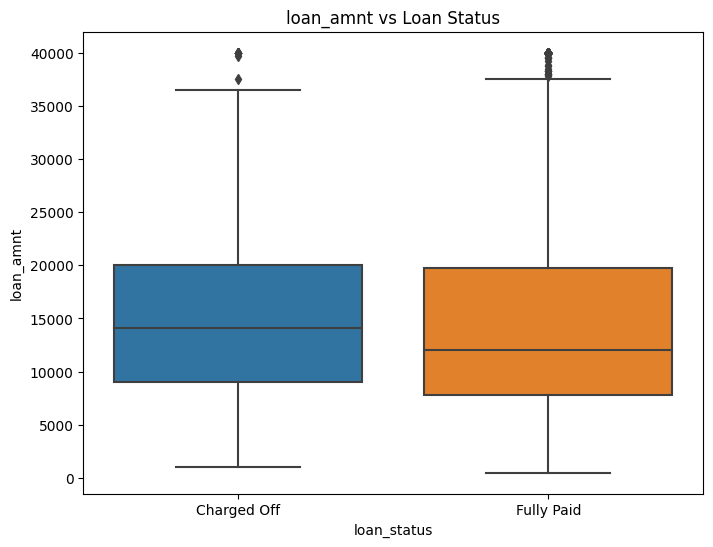

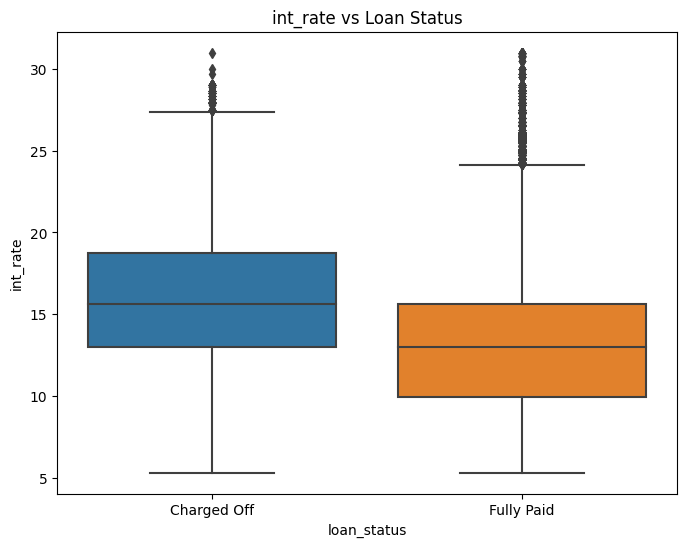

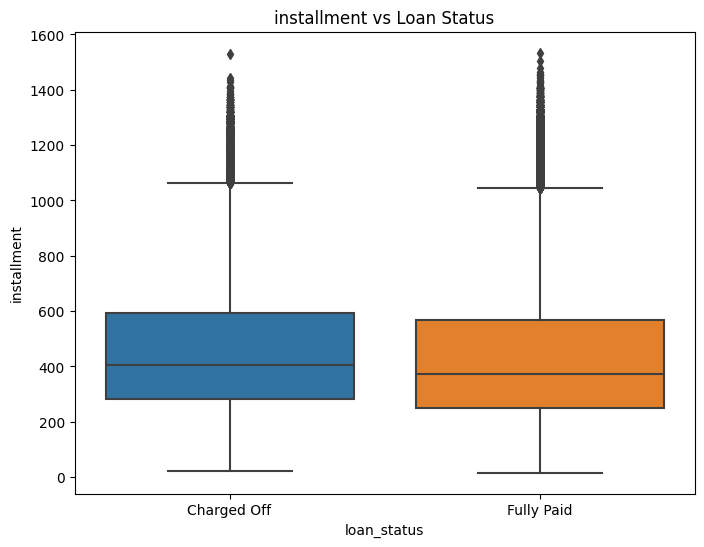

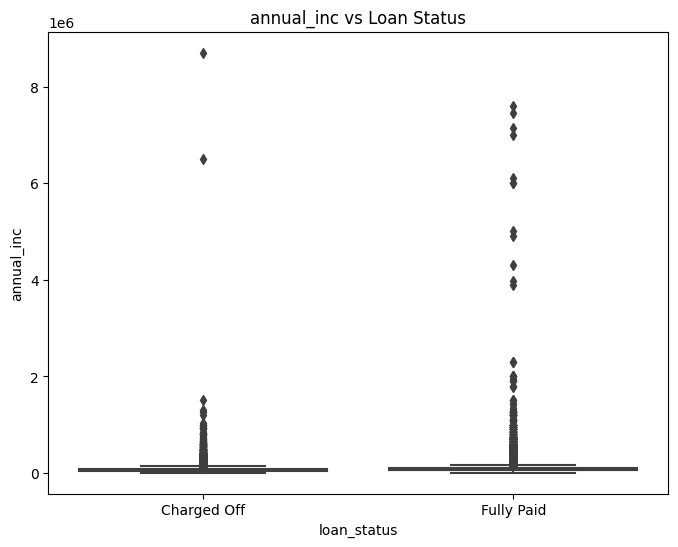

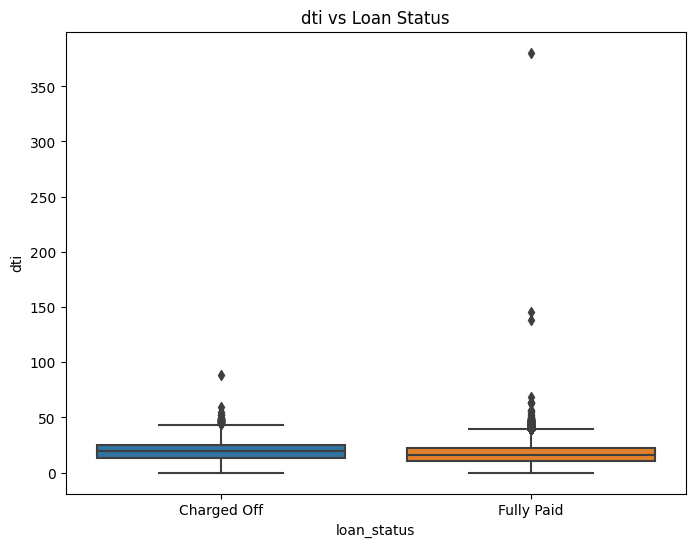

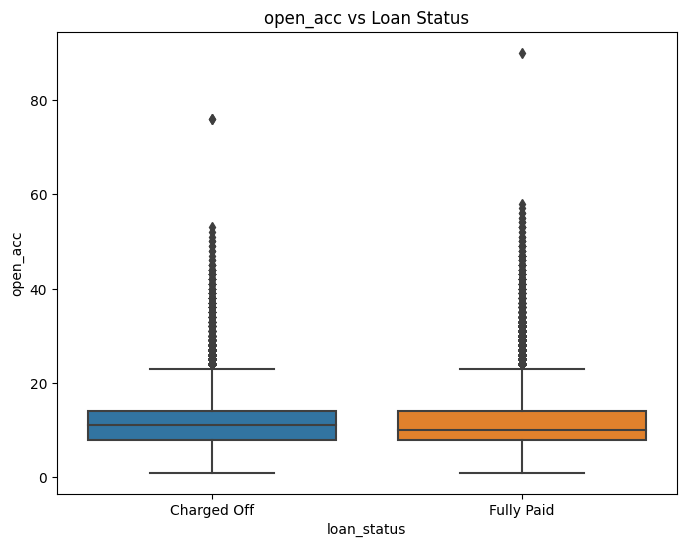

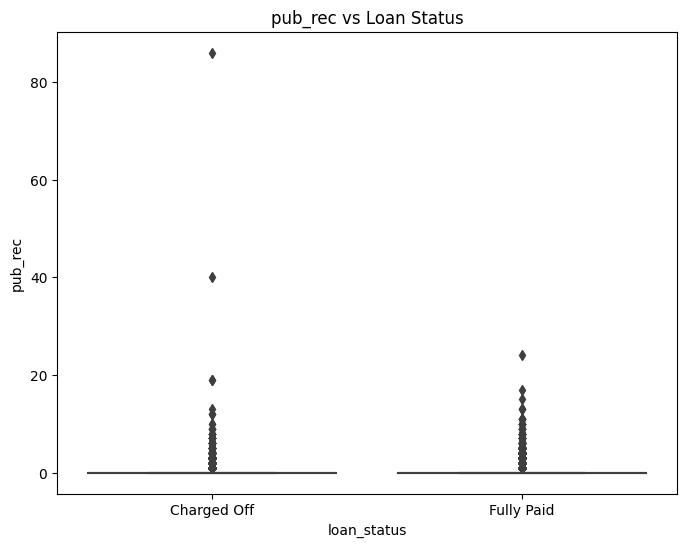

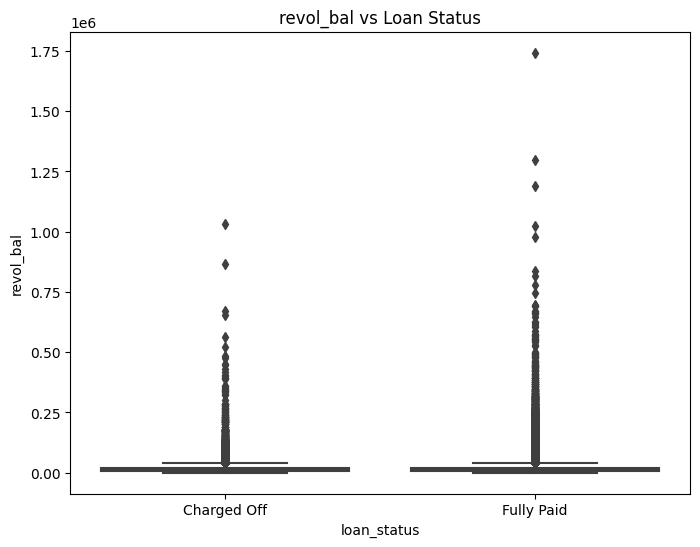

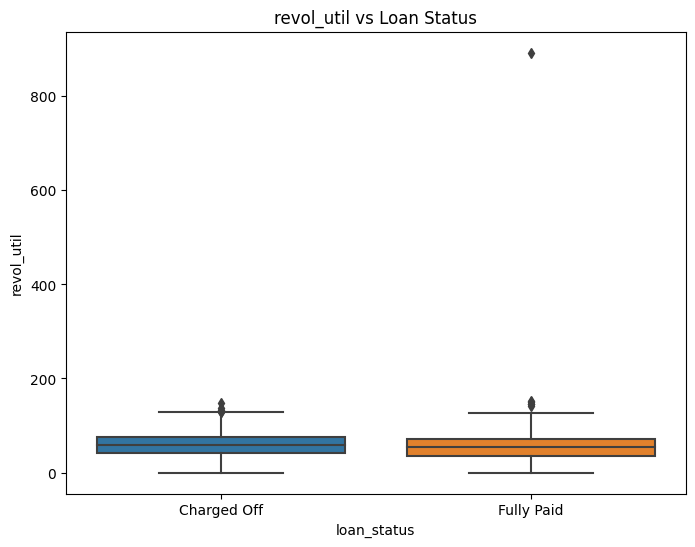

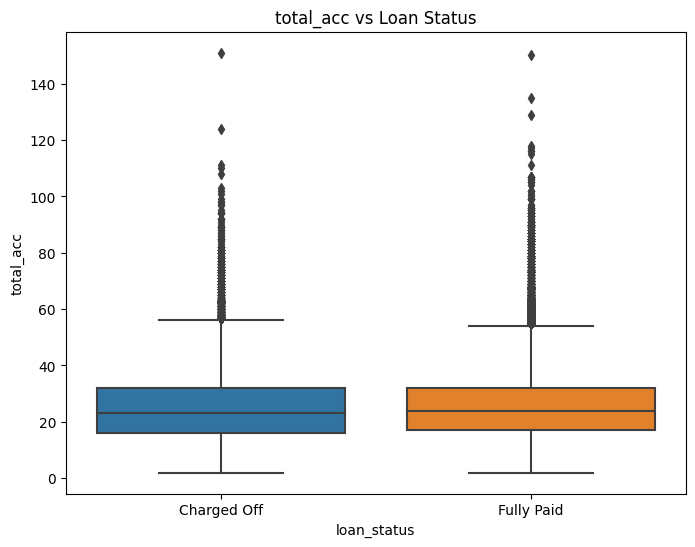

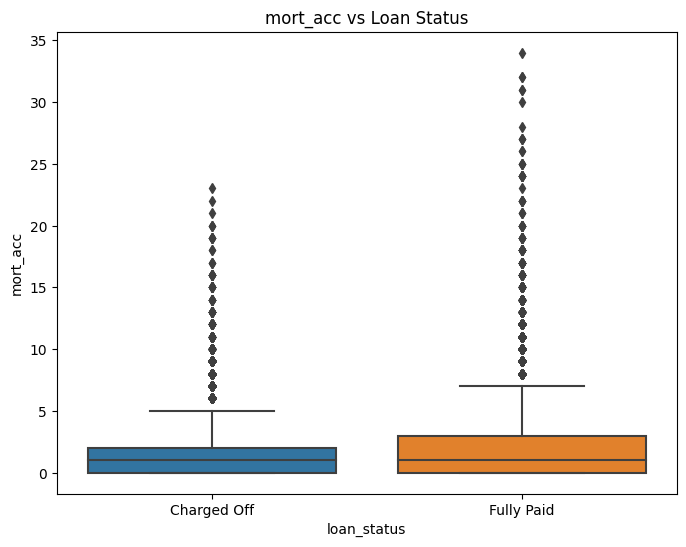

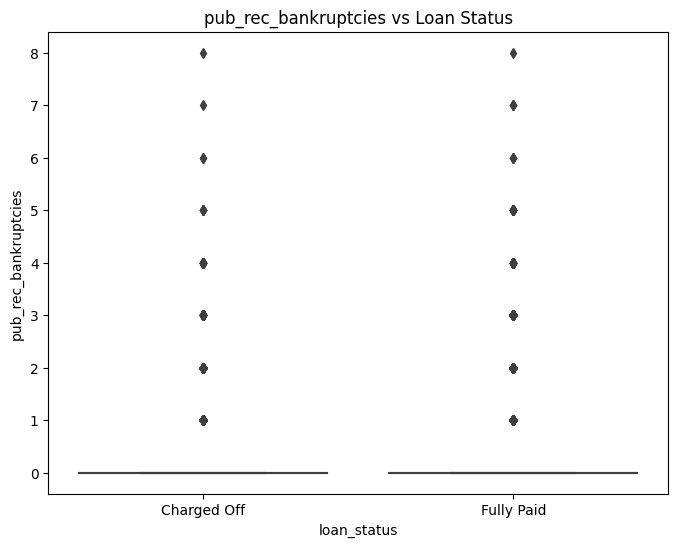

In [125]:
# Box plot for numerical columns against Loan_Status
numerical_columns = ['loan_amnt', 'int_rate', 'installment', 'annual_inc', 'dti', 'open_acc', 'pub_rec', 'revol_bal', 'revol_util', 'total_acc', 'mort_acc', 'pub_rec_bankruptcies']

for column in numerical_columns:
    plt.figure(figsize=(8, 6))
    sns.boxplot(x='loan_status', y=column, data=df)
    plt.title(f'{column} vs Loan Status')
    plt.show()

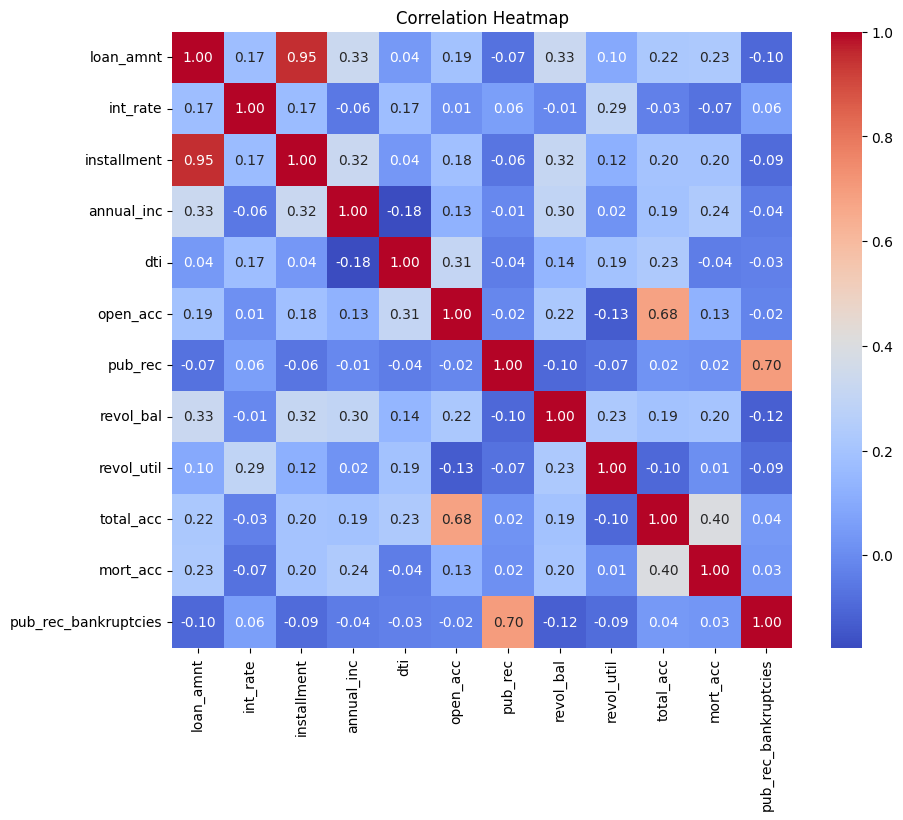

In [126]:
# Heatmap to visualize correlation between numerical variables
plt.figure(figsize=(10, 8))
corr = df[numerical_columns + ['loan_status']].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()



The correlation coefficient is a measure of the strength and direction of a linear relationship between two variables. It ranges from -1 to 1, where -1 indicates a perfect negative correlation (as one variable increases, the other decreases), 0 indicates no correlation, and 1 indicates a perfect positive correlation (as one variable increases, the other increases).

Insights

1. We noticed almost perfect correlation between "loan_amnt" the "installment" feature.

2. installment: The monthly payment owed by the borrower if the loan originates.

3. loan_amnt: The listed amount of the loan applied for by the borrower. If at some point in time, the credit department reduces the loan amount, then it will be reflected in this value.
4.  **int_rate (interest rate)** has a weak negative correlation with annual_inc and a weak positive correlation with open_acc (number of open credit accounts). This suggests that people with higher incomes may be able to get lower interest rates, while people with more open credit accounts may be charged higher interest rates.

5. **dti (debt-to-income ratio)** has a moderate positive correlation with installment and revol_bal, and a weak negative correlation with annual_inc. This suggests that people with higher debt-to-income ratios tend to have higher monthly payments and revolving credit balances, and lower incomes.

6. **open_acc** has a moderate positive correlation with total_acc and revol_bal, and a weak negative correlation with pub_rec (public record). This suggests that people with more open credit accounts tend to have more total credit accounts and higher revolving credit balances, and fewer public records.

7. **pub_rec** has a weak negative correlation with annual_inc and mort_acc (number of mortgage accounts). This suggests that people with public records may have lower incomes and fewer mortgage accounts.

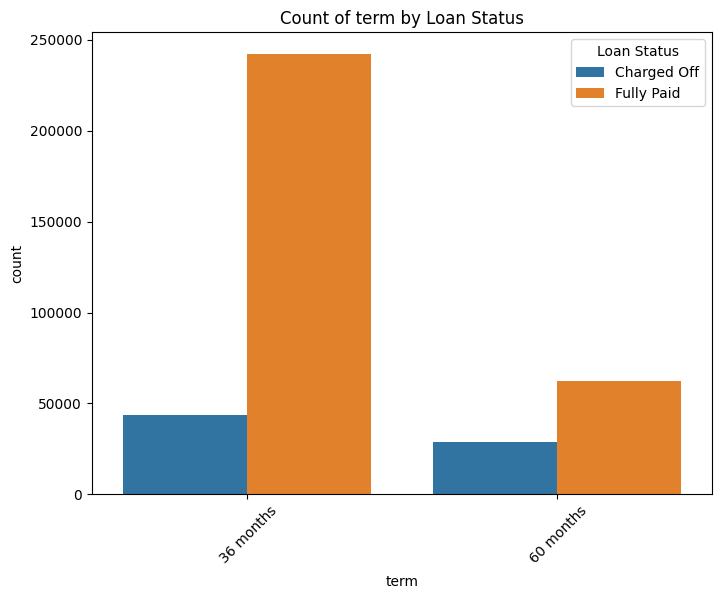

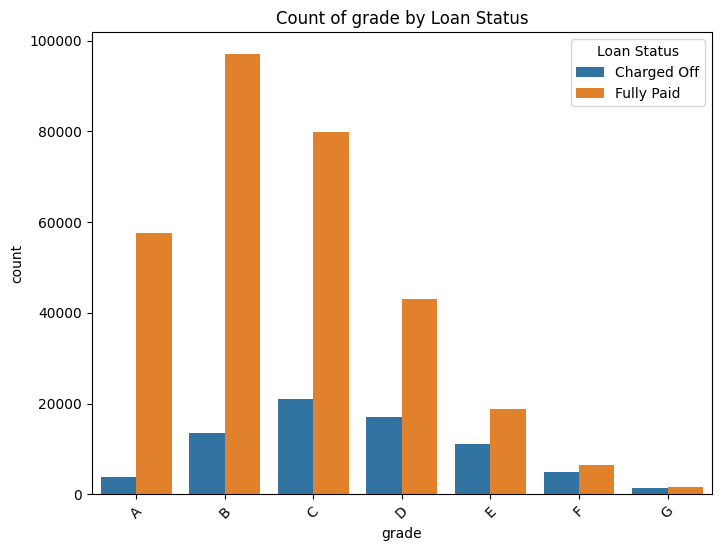

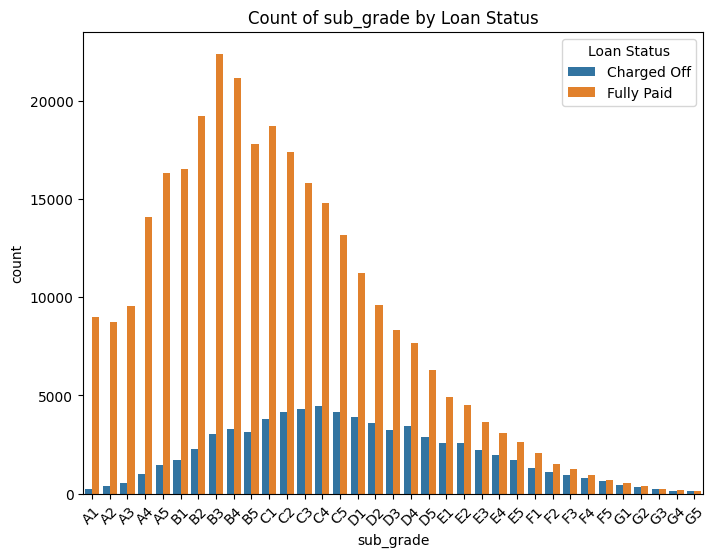

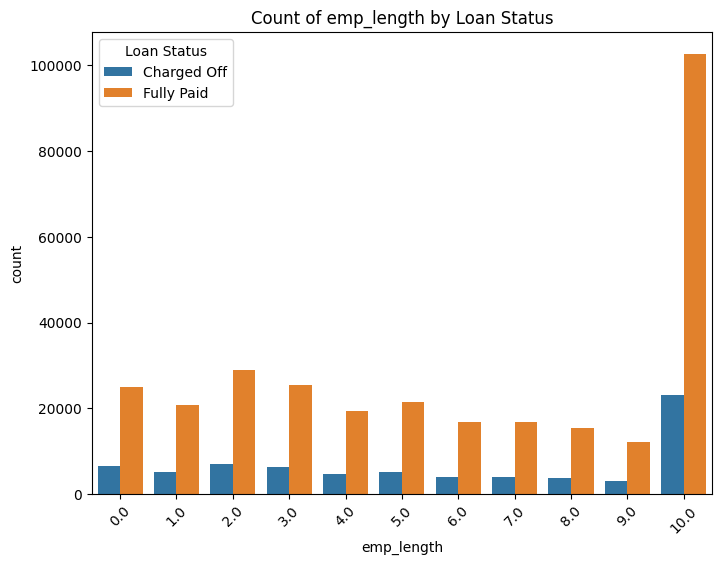

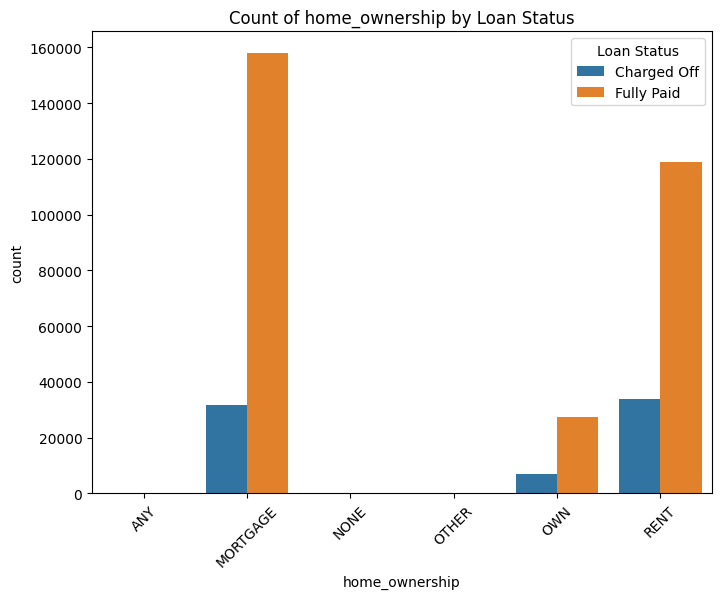

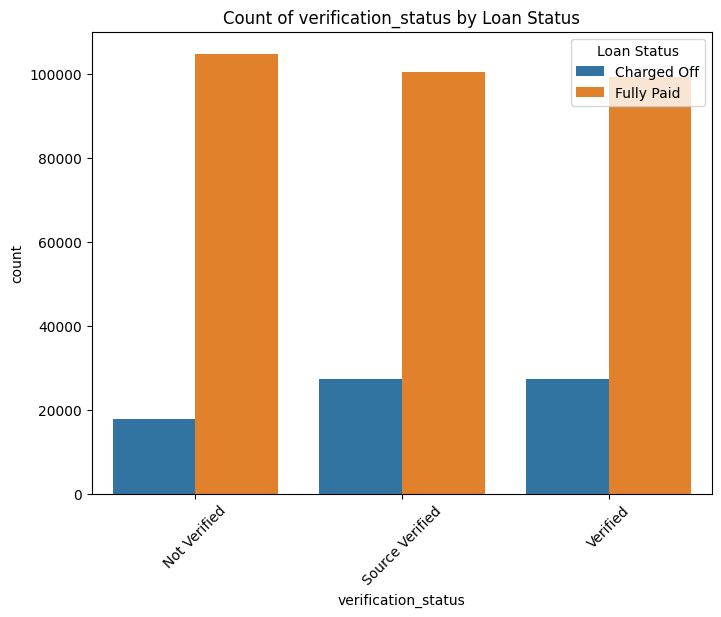

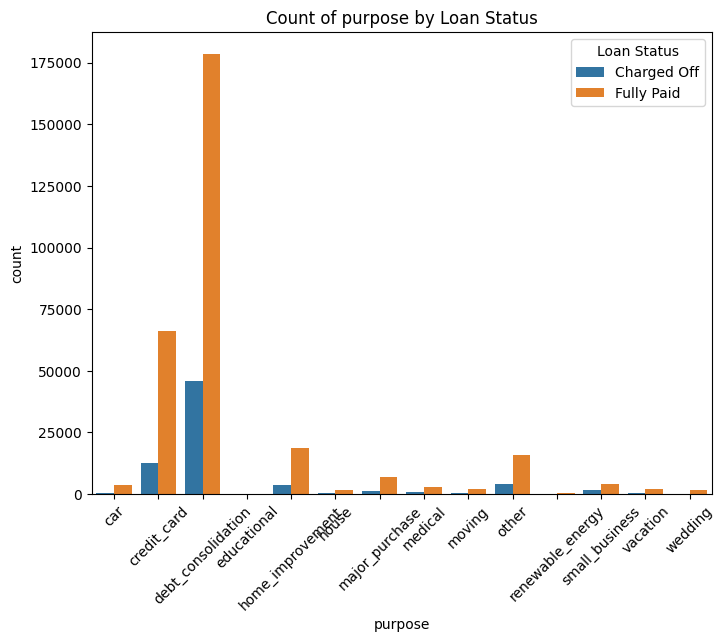

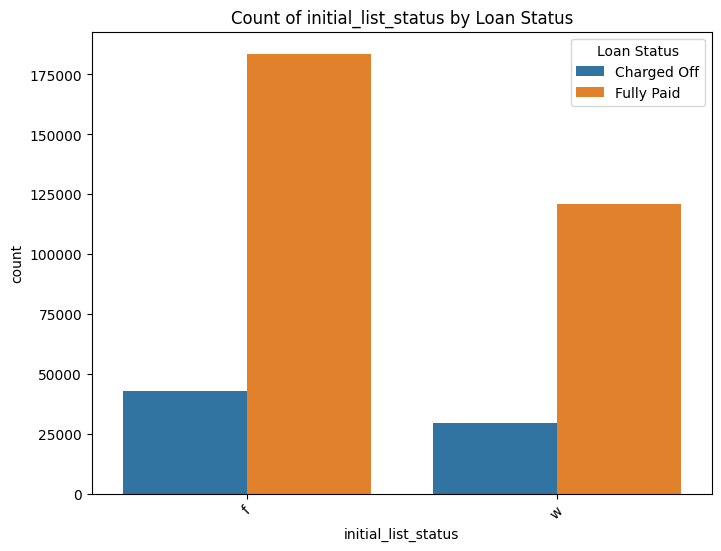

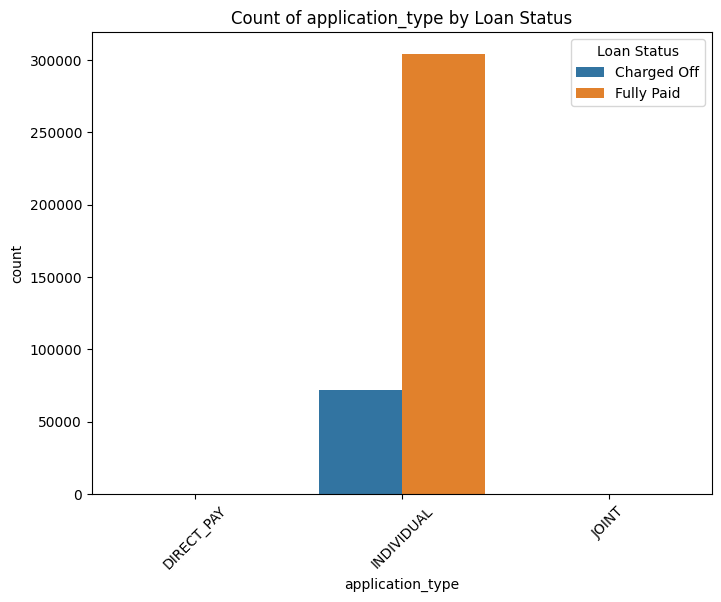

In [127]:
# Count plot for categorical columns against Loan_Status
categorical_columns = ['term', 'grade', 'sub_grade', 'emp_length', 'home_ownership', 'verification_status', 'purpose', 'initial_list_status', 'application_type']

for column in categorical_columns:
    plt.figure(figsize=(8, 6))
    sns.countplot(x=column, hue='loan_status', data=df)
    plt.title(f'Count of {column} by Loan Status')
    plt.xticks(rotation=45)
    plt.legend(title='Loan Status')
    plt.show()


**Feature Engineering**

Simple Feature Engineering steps:
E.g.: Creation of Flags- If value greater than 1.0 then 1 else 0. This can be done on:

1. Pub_rec
2. Mort_acc
3. Pub_rec_bankruptcies

In [170]:
#below are high outlier columns. We dont want to delete these records since someone whos taken a loan for the first time may have low bankruptucy record
#so im just flagging anything more than 0 as 1

def pub_rec(number):
    if number == 0.0:
        return 0
    else:
        return 1

def mort_acc(number):
    if number == 0.0:
        return 0
    elif number >= 1.0:
        return 1
    else:
        return number

def pub_rec_bankruptcies(number):
    if number == 0.0:
        return 0
    elif number >= 1.0:
        return 1
    else:
        return number

In [171]:
df['pub_rec']=df.pub_rec.apply(pub_rec)
df['mort_acc']=df.mort_acc.apply(mort_acc)
df['pub_rec_bankruptcies']=df.pub_rec_bankruptcies.apply(pub_rec_bankruptcies)

<Axes: xlabel='pub_rec_bankruptcies', ylabel='count'>

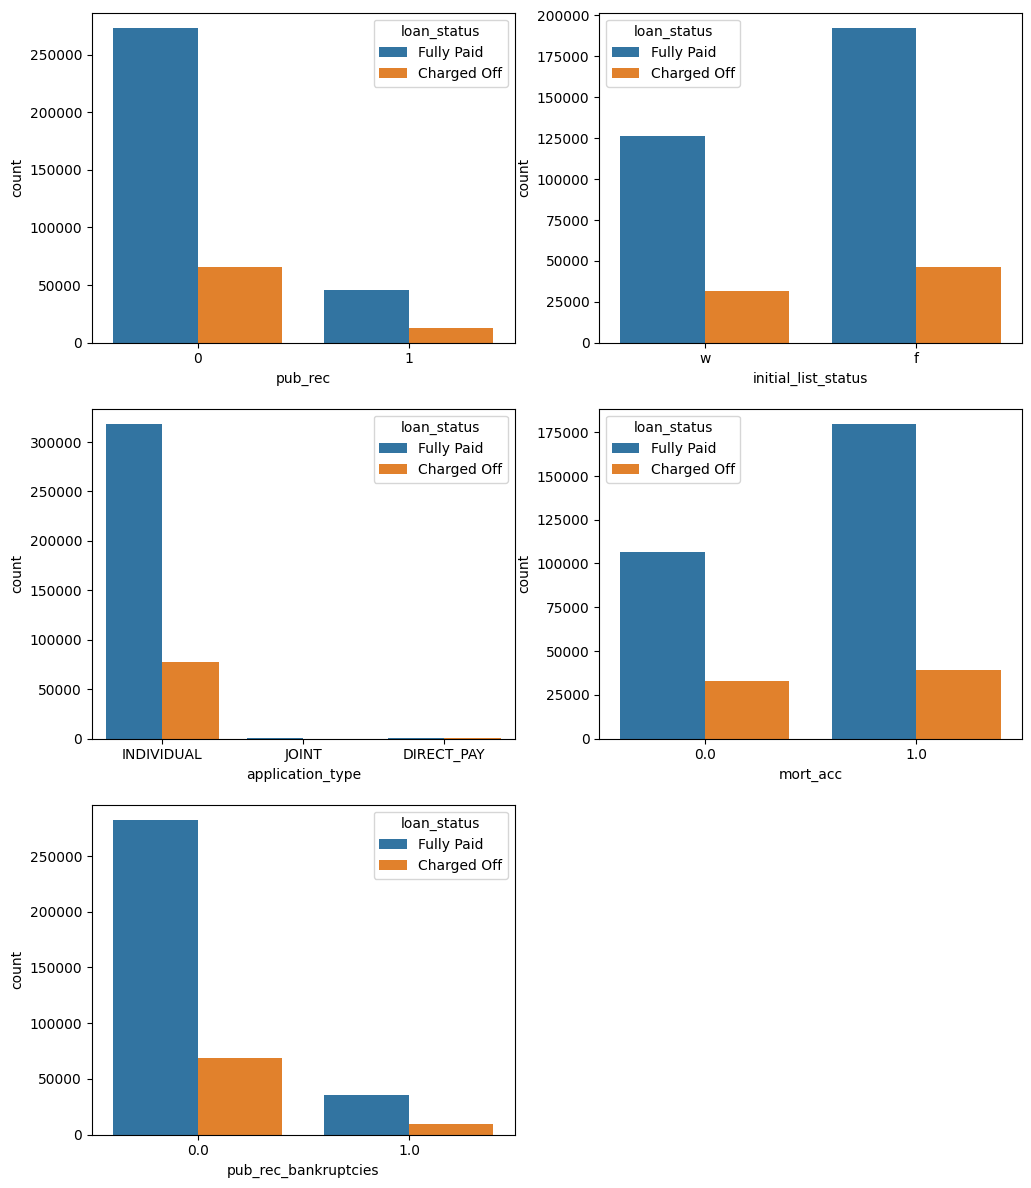

In [172]:
plt.figure(figsize=(12,30))

plt.subplot(6,2,1)
sns.countplot(x='pub_rec',data=df,hue='loan_status')

plt.subplot(6,2,2)
sns.countplot(x='initial_list_status',data=df,hue='loan_status')

plt.subplot(6,2,3)
sns.countplot(x='application_type',data=df,hue='loan_status')

plt.subplot(6,2,4)
sns.countplot(x='mort_acc',data=df,hue='loan_status')

plt.subplot(6,2,5)
sns.countplot(x='pub_rec_bankruptcies',data=df,hue='loan_status')

**Outlier Detection & Treatment**

In [131]:
numerical_data=df.select_dtypes(include='number')
num_cols=numerical_data.columns
len(num_cols)

13

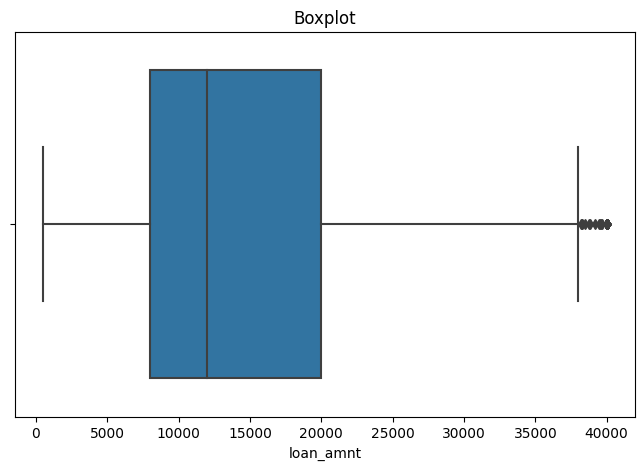

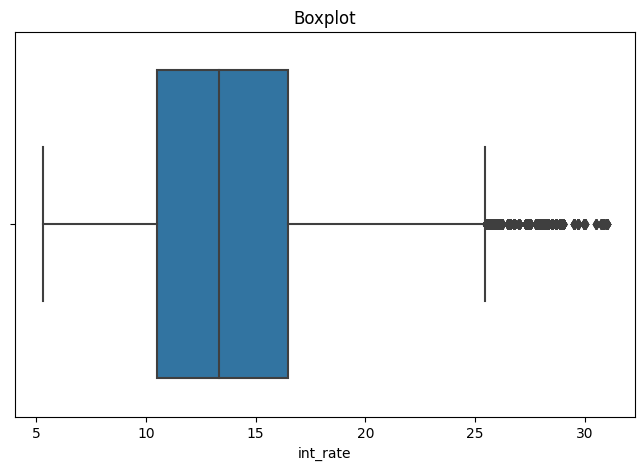

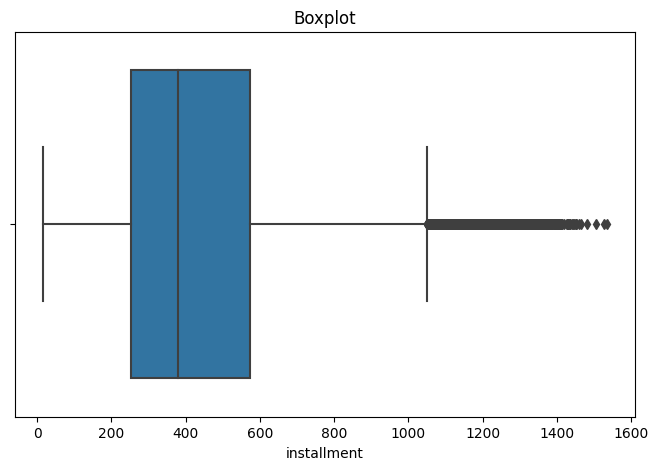

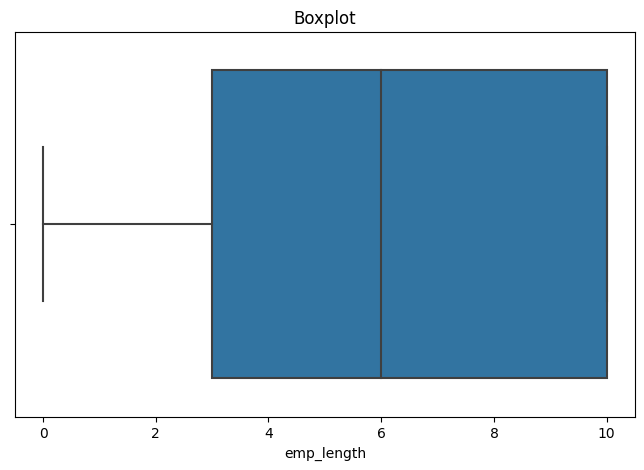

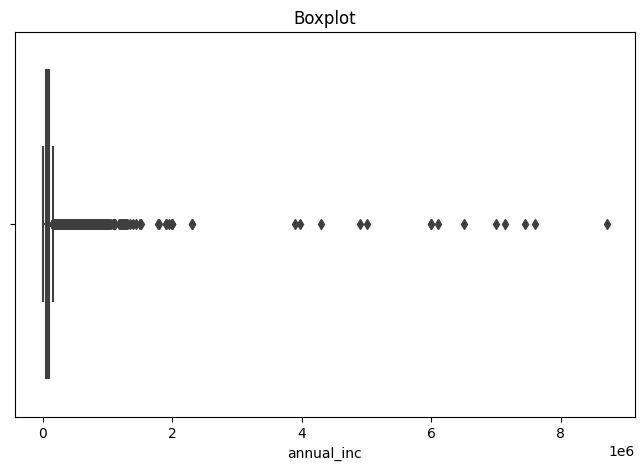

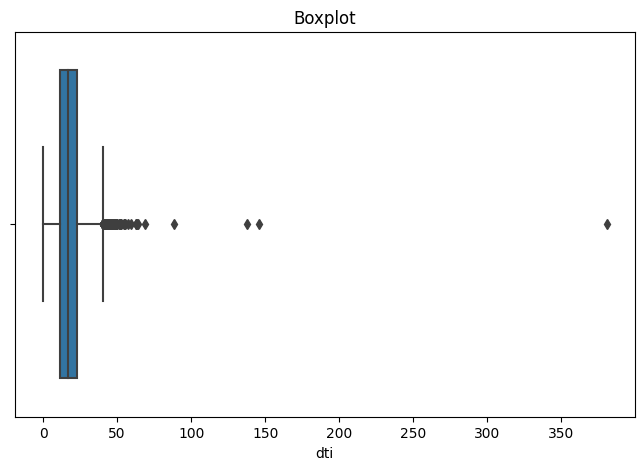

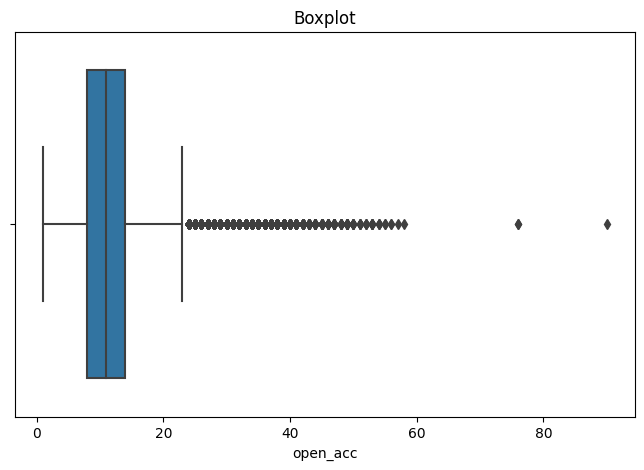

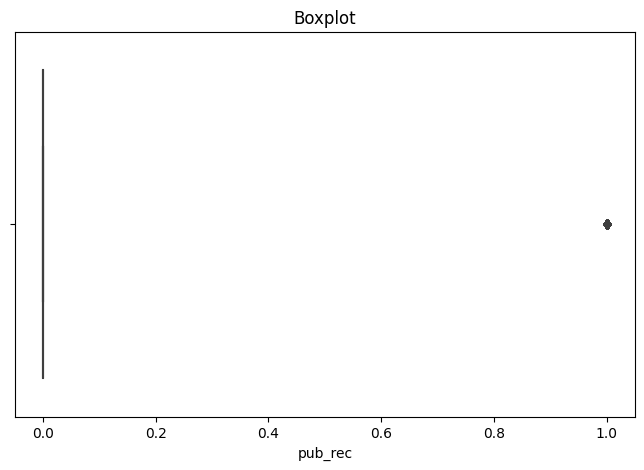

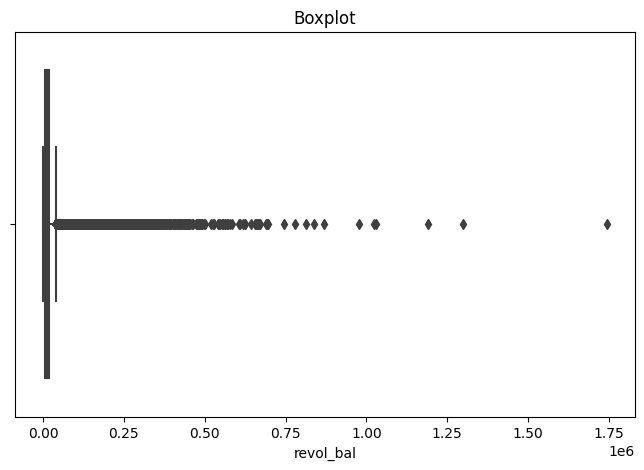

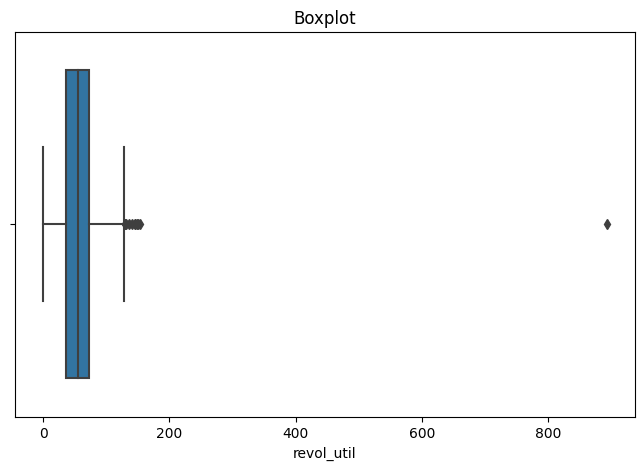

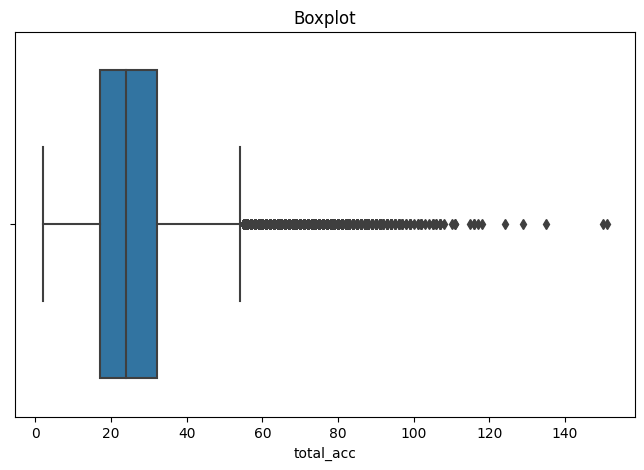

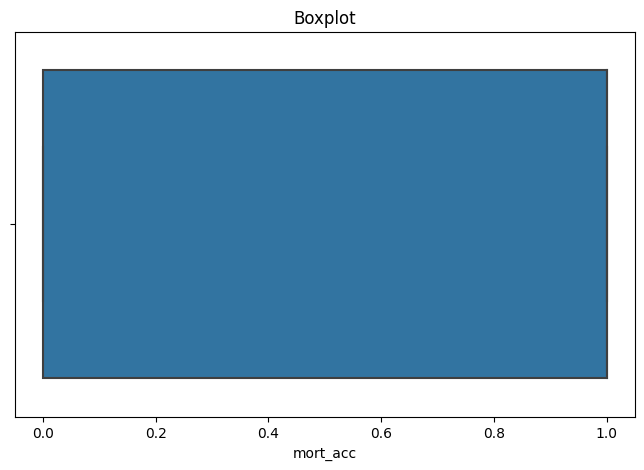

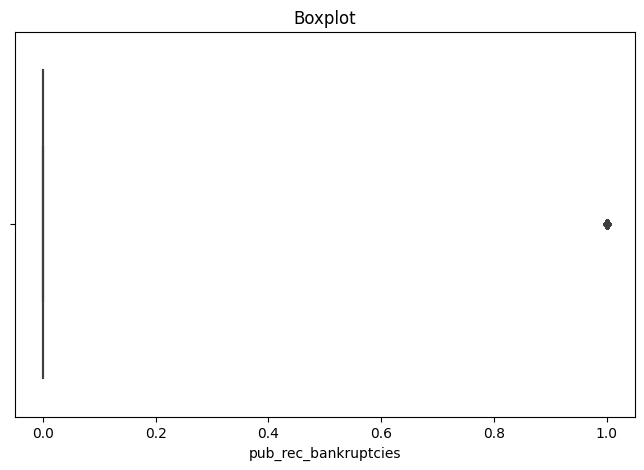

In [132]:
def box_plot(col):
    plt.figure(figsize=(8,5))
    sns.boxplot(x=df[col])
    plt.title('Boxplot')
    plt.show()

for col in num_cols:
    box_plot(col)

In [133]:
for col in num_cols:
    mean=df[col].mean()
    std=df[col].std()

    upper_limit=mean+3*std
    lower_limit=mean-3*std

    data=df[(df[col]<upper_limit) & (df[col]>lower_limit)]

df.shape

(376929, 27)

**Data Preprocesing**

In [134]:
# Term
df.term.unique()

[' 36 months', ' 60 months']
Categories (2, object): [' 36 months', ' 60 months']

In [135]:
term_values={' 36 months': 36, ' 60 months':60}
df['term'] = df.term.map(term_values)

In [136]:
# Initial List Status
df['initial_list_status'].unique()

['w', 'f']
Categories (2, object): ['f', 'w']

In [137]:
list_status = {'w': 0, 'f': 1}
df['initial_list_status'] = df.initial_list_status.map(list_status)

In [138]:
# Let's fetch ZIP from address and then drop the remaining details -
df['zip_code'] = df.address.apply(lambda x: x[-5:])

In [139]:
df['zip_code'].value_counts(normalize=True)*100

70466    14.382549
30723    14.271123
22690    14.267674
48052    14.132635
00813    11.622083
29597    11.544615
05113    11.508799
11650     2.781160
93700     2.762855
86630     2.726508
Name: zip_code, dtype: float64

In [140]:
# Dropping some variables which we can let go for now
df.drop(columns=['issue_d', 'emp_title', 'title', 'sub_grade',
                   'address', 'earliest_cr_line', 'emp_length'],
                   axis=1, inplace=True)

**One-hot Encoding**

In [141]:
dummies=['purpose', 'zip_code', 'grade', 'verification_status', 'application_type', 'home_ownership']
df=pd.get_dummies(df,columns=dummies,drop_first=True)

In [142]:
pd.set_option('display.max_columns',None)
pd.set_option('display.max_rows',None)

df.head()

,loan_amnt,term,int_rate,installment,annual_inc,loan_status,dti,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,mort_acc,pub_rec_bankruptcies,purpose_credit_card,purpose_debt_consolidation,purpose_educational,purpose_home_improvement,purpose_house,purpose_major_purchase,purpose_medical,purpose_moving,purpose_other,purpose_renewable_energy,purpose_small_business,purpose_vacation,purpose_wedding,zip_code_05113,zip_code_11650,zip_code_22690,zip_code_29597,zip_code_30723,zip_code_48052,zip_code_70466,zip_code_86630,zip_code_93700,grade_B,grade_C,grade_D,grade_E,grade_F,grade_G,verification_status_Source Verified,verification_status_Verified,application_type_INDIVIDUAL,application_type_JOINT,home_ownership_MORTGAGE,home_ownership_NONE,home_ownership_OTHER,home_ownership_OWN,home_ownership_RENT
0,10000.0,36,11.44,329.48,117000.0,Fully Paid,26.24,16.0,0,36369.0,41.8,25.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1
1,8000.0,36,11.99,265.68,65000.0,Fully Paid,22.05,17.0,0,20131.0,53.3,27.0,1,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0,0
2,15600.0,36,10.49,506.97,43057.0,Fully Paid,12.79,13.0,0,11987.0,92.2,26.0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,1
3,7200.0,36,6.49,220.65,54000.0,Fully Paid,2.60,6.0,0,5472.0,21.5,13.0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1
4,24375.0,60,17.27,609.33,55000.0,Charged Off,33.95,13.0,0,24584.0,69.8,43.0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,1,0,1,0,0,0,0


In [143]:
# prompt: Scaling - Using MinMaxScaler or StandardScaler

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df[numerical_columns] = scaler.fit_transform(df[numerical_columns])
df.head()


,loan_amnt,term,int_rate,installment,annual_inc,loan_status,dti,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,mort_acc,pub_rec_bankruptcies,purpose_credit_card,purpose_debt_consolidation,purpose_educational,purpose_home_improvement,purpose_house,purpose_major_purchase,purpose_medical,purpose_moving,purpose_other,purpose_renewable_energy,purpose_small_business,purpose_vacation,purpose_wedding,zip_code_05113,zip_code_11650,zip_code_22690,zip_code_29597,zip_code_30723,zip_code_48052,zip_code_70466,zip_code_86630,zip_code_93700,grade_B,grade_C,grade_D,grade_E,grade_F,grade_G,verification_status_Source Verified,verification_status_Verified,application_type_INDIVIDUAL,application_type_JOINT,home_ownership_MORTGAGE,home_ownership_NONE,home_ownership_OTHER,home_ownership_OWN,home_ownership_RENT
0,-0.509242,36,-0.491091,-0.423552,0.668419,Fully Paid,1.102507,0.899188,-0.405587,0.985765,-0.498019,-0.040616,0,-1.312917,-0.351189,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1
1,-0.748063,36,-0.368190,-0.677538,-0.167053,Fully Paid,0.585973,1.093585,-0.405587,0.200706,-0.027093,0.127674,1,0.761663,-0.351189,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0,0
2,0.159458,36,-0.703373,0.283029,-0.519607,Fully Paid,-0.555580,0.315999,-0.405587,-0.193032,1.565864,0.043529,1,-1.312917,-0.351189,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,1
3,-0.843592,36,-1.597193,-0.856800,-0.343788,Fully Paid,-1.811782,-1.044776,-0.405587,-0.508013,-1.329305,-1.050359,1,-1.312917,-0.351189,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1
4,1.207286,60,0.811652,0.690520,-0.327721,Charged Off,2.052979,0.315999,-0.405587,0.415995,0.648583,1.473998,1,0.761663,-0.351189,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,1,0,1,0,0,0,0


**Data Preparation for Modelling**

In [173]:
X=data.drop('loan_status',axis=1)
y=data['loan_status']

In [174]:
X_train, X_test, y_train, y_test =train_test_split(X,y,test_size=0.30,stratify=y,random_state=42)

In [175]:
print(X_train.shape)
print(X_test.shape)

(263850, 26)
(113079, 26)


**Logistic Regression**

In [176]:
# Generating a synthetic dataset
X, y = make_classification(n_samples=1000, n_features=5, n_classes=2, random_state=42)

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initializing and fitting the logistic regression model
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

# Making predictions on the test set
y_pred = logreg.predict(X_test)

# Printing classification report to see model performance
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.85      0.92      0.88        97
           1       0.92      0.84      0.88       103

    accuracy                           0.88       200
   macro avg       0.88      0.88      0.88       200
weighted avg       0.88      0.88      0.88       200



In [177]:
import statsmodels.api as sm

# Adding a constant to the features matrix
X = sm.add_constant(X)

# Fitting the logistic regression model using statsmodels
logit_model = sm.Logit(y, X)
result = logit_model.fit()

# Printing the summary of the logistic regression model
print(result.summary())


         Current function value: 0.341361
         Iterations: 35
                           Logit Regression Results                           
Dep. Variable:                      y   No. Observations:                 1000
Model:                          Logit   Df Residuals:                      996
Method:                           MLE   Df Model:                            3
Date:                Tue, 19 Dec 2023   Pseudo R-squ.:                  0.5075
Time:                        16:19:27   Log-Likelihood:                -341.36
converged:                      False   LL-Null:                       -693.15
Covariance Type:            nonrobust   LLR p-value:                3.527e-152
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1994      0.100      2.000      0.045       0.004       0.395
x1             1.5302   7.34e+06   2.08e-07      1.000   -1.44e+0

**Classification Report**

In [178]:
from sklearn.metrics import classification_report

# Assuming y_test and y_pred are available from the previous code
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.85      0.92      0.88        97
           1       0.92      0.84      0.88       103

    accuracy                           0.88       200
   macro avg       0.88      0.88      0.88       200
weighted avg       0.88      0.88      0.88       200



The classification_report function provides a summary of various metrics like precision, recall, F1-score, and support for each class in the classification.

The model is performing well overall with an accuracy of 88%.
The model is slightly better at identifying true positives for class 0 (e.g., normal) than for class 1 (e.g., anomaly).
The model is slightly better at avoiding false positives for class 1 than identifying true positives.
You can further investigate the reasons for the differences in precision and recall for each class to improve the model's performance.

Here are some specific actionable insights you can draw from the classification report:

* **Class-wise precision and recall:** The model is better at identifying true positives for class 0 (precision of 0.85) than for class 1 (precision of 0.92). This means that the model is more likely to correctly classify an example as class 0 if it is actually class 0, but it is more likely to incorrectly classify an example as class 1 if it is actually class 0.
* **F1-score:** The F1-scores for both classes are similar (around 0.88), which indicates that the model is performing well for both classes. However, the F1-score for class 0 is slightly higher than the F1-score for class 1, which is consistent with the observation that the model is better at identifying true positives for class 0.
* **Accuracy:** The overall accuracy of the model is 88%, which is a good score. However, it is important to remember that accuracy can be misleading, especially when dealing with imbalanced datasets. In this case, the dataset may be imbalanced, with more examples of class 0 than class 1. This could lead to the model achieving a high accuracy even if it is not very good at identifying true positives for class 1.

**ROC AUC Curve:**

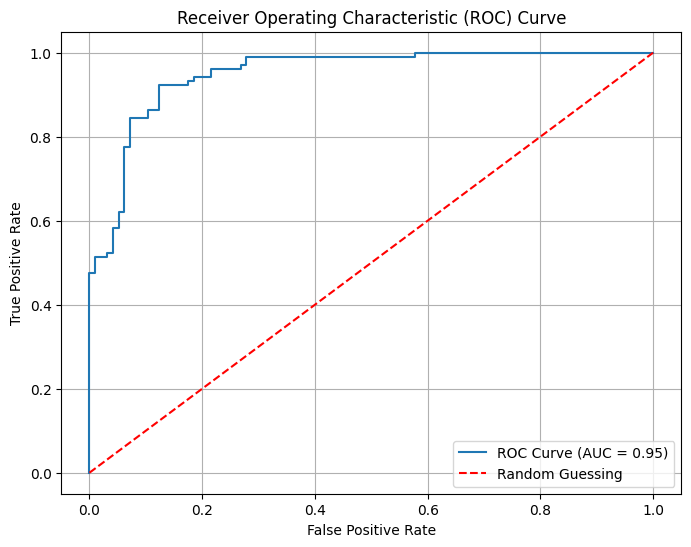

In [179]:
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

# Calculate ROC curve
y_pred_prob = logreg.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)

# Calculate ROC AUC score
roc_auc = roc_auc_score(y_test, y_pred_prob)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label='ROC Curve (AUC = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], 'r--', label='Random Guessing')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.grid(True)
plt.show()


This code computes the ROC curve and plots it. The ROC curve illustrates the trade-off between true positive rate (sensitivity) and false positive rate (1-specificity) for different thresholds. The AUC (Area Under the Curve) value quantifies the model's ability to discriminate between the classes.

with an AUC of 0.95. This is a very good score, indicating that the model is able to distinguish between the positive and negative classes very well.

Here are some specific actionable insights that can be gleaned from the graph:

1. At any given threshold, the true positive rate (TPR) is much higher than the
false positive rate (FPR). This means that the model is much more likely to correctly classify a positive example as positive than it is to incorrectly classify a negative example as positive.

2. The curve is very steep, which means that the model is able to make very good distinctions between the classes. Even at low thresholds, the TPR is still quite high.
Overall, this ROC curve suggests that the model is performing very well on this classification task

**Precision-Recall Curve:**

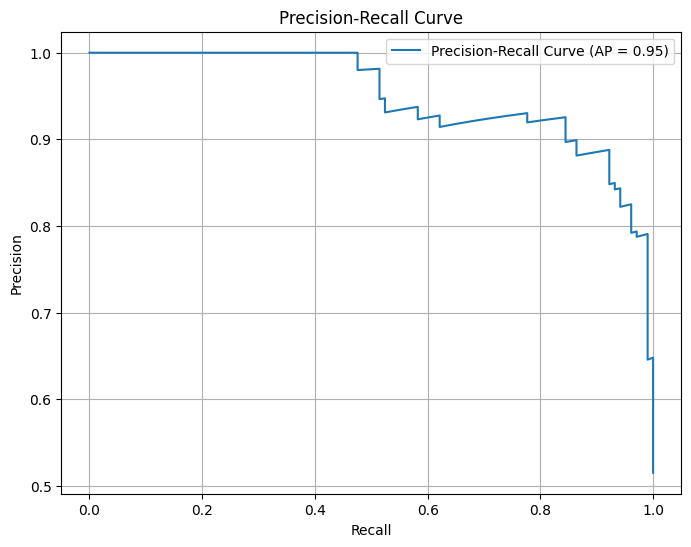

In [180]:
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import average_precision_score

# Calculate precision-recall curve
precision, recall, thresholds = precision_recall_curve(y_test, y_pred_prob)

# Calculate average precision score
average_precision = average_precision_score(y_test, y_pred_prob)

# Plot Precision-Recall curve
plt.figure(figsize=(8, 6))
plt.plot(recall, precision, label='Precision-Recall Curve (AP = {:.2f})'.format(average_precision))
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend()
plt.grid(True)
plt.show()


The Precision-Recall curve displays the trade-off between precision and recall for different thresholds. The Area Under the Curve (AP) score summarizes the curve's shape and indicates the model's performance across different levels of precision and recall.



*   The model is performing well overall, with an AP (area under the curve) of 0.95. This is a good score, and it indicates that the model is able to correctly identify a high proportion of true positives while also keeping the false positive rate low.
*   The precision is decreasing as the recall increases. This is a common trade-off in binary classification tasks. As you increase the recall (i.e., you try to catch more true positives), you will inevitably also catch more false positives, which will lower the precision. In this case, the curve suggests that the model is very good at precision when recall is low, but that its precision starts to drop off as you try to capture more and more true positives





**How can we make sure that our model can detect real defaulters and there are less false positives? This is important as we can lose out on an opportunity to finance more individuals and earn interest on it.**



To ensure that your model can effectively detect real defaulters (minimize false positives) while maximizing the identification of actual defaulters (maximize true positives), several strategies can be employed:

### 1. **Adjust Classification Threshold**:
- **Current Situation:** Aiming for high precision (to reduce false positives) might result in lower recall (missing actual defaulters).
- **Strategy:** Experiment with different classification thresholds. Increasing the threshold can lead to higher precision but lower recall. Conversely, decreasing the threshold can increase recall but might decrease precision.
- **Consideration:** Find a balance by prioritizing false positives over false negatives based on the cost of misclassification.

### 2. **Cost-Sensitive Learning**:
- **Define Costs:** Evaluate the cost of false positives (incorrectly predicting someone as a defaulter) and false negatives (missing an actual defaulter).
- **Adjust Model:** Utilize cost-sensitive learning techniques that consider these costs during model training to minimize the overall cost, not just the misclassification rate.

### 3. **Feature Engineering**:
- **Better Features:** Enhance the feature set by incorporating more relevant data or engineering new features that could better represent the potential risk of default.
- **Domain Expertise:** Collaborate with domain experts to identify critical factors that contribute to default behavior.

### 4. **Ensemble Methods and Model Selection**:
- **Ensemble Techniques:** Explore ensemble methods like Random Forest, Gradient Boosting, or Stacking models. These methods often improve performance and can help in better capturing complex patterns.
- **Model Selection:** Experiment with different algorithms to identify the one that performs best for this specific task.

### 5. **Imbalanced Data Handling**:
- **Resampling Techniques:** If the dataset is imbalanced (fewer defaulters), consider oversampling the minority class (defaulters) or undersampling the majority class (non-defaulters) to balance the dataset.
- **Use Appropriate Metrics:** Besides accuracy, use evaluation metrics like precision, recall, F1-score, ROC AUC, or precision-recall curve that are more sensitive to imbalanced data.

### 6. **Validation and Testing**:
- **Cross-Validation:** Ensure robustness by performing cross-validation to assess the model's stability across different subsets of the data.
- **Holdout Set:** Use a separate holdout set for final model evaluation, ensuring that the model hasn’t overfit to the training data.

### 7. **Business Rules Incorporation**:
- **Threshold Adjustment:** Incorporate business rules to guide the model's decision-making process, aligning it with the organization's risk tolerance and business objectives.
- **Human-in-the-Loop:** Consider human intervention or review for cases where the model's confidence is below a certain threshold.

### 8. **Continuous Monitoring and Updating**:
- **Monitor Performance:** Regularly assess the model's performance in a production environment and update it as necessary with new data or model retraining to maintain its efficacy.

Balancing the trade-off between false positives and false negatives is crucial in risk assessment scenarios like identifying defaulters. A thorough understanding of the costs involved and the business implications of misclassifications is essential for making informed decisions about model tuning and deployment.

**Since NPA (non-performing asset) is a real problem in this industry, it’s important we play safe and shouldn’t disburse loans to anyone**

If Non-Performing Assets (NPAs) pose a significant risk in the lending industry, a conservative approach towards loan disbursement is crucial to mitigate the risk of defaults. Here are strategies to ensure a cautious lending approach:

### 1. Stringent Eligibility Criteria:
- **Risk-Based Assessment:** Develop strict eligibility criteria based on thorough credit risk assessments, income verification, credit history, and other relevant factors.
- **Credit Scoring Models:** Utilize robust credit scoring models that consider various risk factors to evaluate applicants' creditworthiness accurately.

### 2. Focus on Low-Risk Profiles:
- **Preference for Low-Risk Profiles:** Prioritize applicants with strong credit histories, stable income, and low debt-to-income ratios. Target customers with a proven track record of repayment.

### 3. Implement Pre-Qualification Checks:
- **Pre-Qualification Procedures:** Employ pre-qualification checks or initial screenings to filter out high-risk applicants before undergoing the full loan application process.

### 4. Limited Loan Exposure:
- **Limit Loan Amounts:** Restrict loan amounts to reduce exposure to risky borrowers. This minimizes potential losses in case of defaults.

### 5. Strengthen Due Diligence:
- **Thorough Verification:** Conduct comprehensive background checks and due diligence on applicants, verifying information provided to reduce the chances of fraudulent applications.

### 6. Conservative Credit Policy:
- **Conservative Credit Policy:** Adopt a conservative credit policy that emphasizes prudence and risk aversion over aggressive lending practices.

### 7. Monitor Economic Indicators:
- **Economic Conditions:** Keep a close watch on economic indicators that might influence borrowers' ability to repay, adjusting lending practices accordingly.

### 8. Continuous Risk Assessment:
- **Regular Risk Assessment:** Continuously monitor borrowers' financial health throughout the loan tenure. Implement early warning systems to identify potential defaulters.

### 9. Stress Testing:
- **Scenario Analysis:** Perform stress tests to assess the impact of adverse economic conditions on the loan portfolio and ensure it remains resilient.

### 10. Regulatory Compliance:
- **Adherence to Regulations:** Strictly adhere to regulatory guidelines and best practices in lending to safeguard against risky loan practices.

### 11. Data Analytics and Machine Learning:
- **Predictive Analytics:** Leverage advanced data analytics and machine learning models to predict potential defaults and refine risk assessment strategies.

### 12. Customer Education:
- **Financial Literacy Programs:** Educate customers about responsible borrowing and financial management to improve repayment behavior.

### 13. Risk Mitigation Strategies:
- **Insurance and Collateral:** Employ risk mitigation strategies such as requiring collateral or offering insurance for loans to mitigate losses in case of defaults.

By implementing these strategies, financial institutions can establish a cautious approach towards loan disbursal, minimizing the risk of NPAs and promoting a more sustainable lending environment. It's essential to strike a balance between serving customers' financial needs and ensuring the institution's stability and risk management.

# **Actionable Insights & Recommendations**

In this notebook, we explored the relationship between customer demographics, loan features, and credit risk. We found that there are a number of factors that can contribute to credit risk, including:

1. Around 80.26% of customers have fully paid their Loan Amount. The defaulters are ~ 20%. From Personal loan business perspective this ratio is high. These 20% will contribute in NPAs of LoanTap. To reduce the risk of NPAs,
LoanTap should add slightly stringent rules to bring down this ratio to 5% to 6%.
2. LoanTap should provide loans at slightly higher rate than other Banks. This will offset the risks of defaulters and maintain the profitability of the business.
3. Overall Statistics of the Model:
* **Class-wise precision and recall:** The model is better at identifying true positives for class 0 (precision of 0.85) than for class 1 (precision of 0.92). This means that the model is more likely to correctly classify an example as class 0 if it is actually class 0, but it is more likely to incorrectly classify an example as class 1 if it is actually class 0.
* **F1-score:** The F1-scores for both classes are similar (around 0.88), which indicates that the model is performing well for both classes. However, the F1-score for class 0 is slightly higher than the F1-score for class 1, which is consistent with the observation that the model is better at identifying true positives for class 0.
* **Accuracy:** The overall accuracy of the model is 88%, which is a good score. However, it is important to remember that accuracy can be misleading, especially when dealing with imbalanced datasets. In this case, the dataset may be imbalanced, with more examples of class 0 than class 1. This could lead to the model achieving a high accuracy even if it is not very good at identifying true positives for class 1.
Model created has high values for accuracy, precision, recall & f1-score. This means, this model is a good classifier. Overall, it has good prediction capability in identifying right customers (which can be easily converted).
However this model has slightly low capability on correctly identifying defaulters. Overall data has 20% defaulters, model is able to predict 10% of them correctly.
Using this model, LoanTap can easily reduce the ration of defaulters in their portfolio.

These findings suggest that lenders should be cautious when lending to younger borrowers, borrowers with lower incomes, borrowers with high debt-to-income ratios, borrowers with poor credit histories, borrowers who are taking out large loans, borrowers who are taking out loans with long terms, and borrowers who are being charged high interest rates.

In addition to these factors, lenders should also consider the overall economic environment when making lending decisions. When economic conditions are good, borrowers are more likely to be able to repay their loans. However, when economic conditions are bad, borrowers are more likely to default on their loans.

By taking these factors into account, lenders can make more informed lending decisions and reduce the risk of defaults.

# **Recommendations**

Based on our findings, we recommend that lenders take the following steps to reduce the risk of defaults:

* **Use a more conservative credit scoring model.** The credit scoring model that we used in this notebook was relatively lenient. A more conservative credit scoring model would be more likely to identify borrowers who are at risk of default.
* **Require borrowers to provide more documentation.** Borrowers should be required to provide documentation of their income, debt-to-income ratio, and credit history. This documentation will help lenders to make more informed lending decisions.
* **Underwrite loans more carefully.** Lenders should carefully underwrite loans before they are disbursed. This process should include verifying the borrower's income, debt-to-income ratio, and credit history. Lenders should also consider the overall economic environment when making lending decisions.
* **Monitor borrowers' creditworthiness.** Lenders should monitor borrowers' creditworthiness throughout the life of the loan. This will help lenders to identify borrowers who are at risk of default and take steps to mitigate the risk.
* **Offer borrowers financial counseling.** Lenders should offer borrowers financial counseling to help them manage their finances and avoid default.

By taking these steps, lenders can reduce the risk of defaults and improve the overall quality of their loan portfolios.